<a href="https://colab.research.google.com/github/tariqjaveed74/summ/blob/main/Yolov8s_m_Test_and_train_on_custom_datasety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May 18 18:07:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [1]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [24]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
%cd {HOME}
!yolo task=detect mode=predict model=yolov8s.pt conf=0.25 source='/content/family-and-dog.jpg'

/content
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/family-and-dog.jpg: 448x640 2 persons, 1 dog, 1 handbag, 39.0ms
Speed: 3.3ms preprocess, 39.0ms inference, 143.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


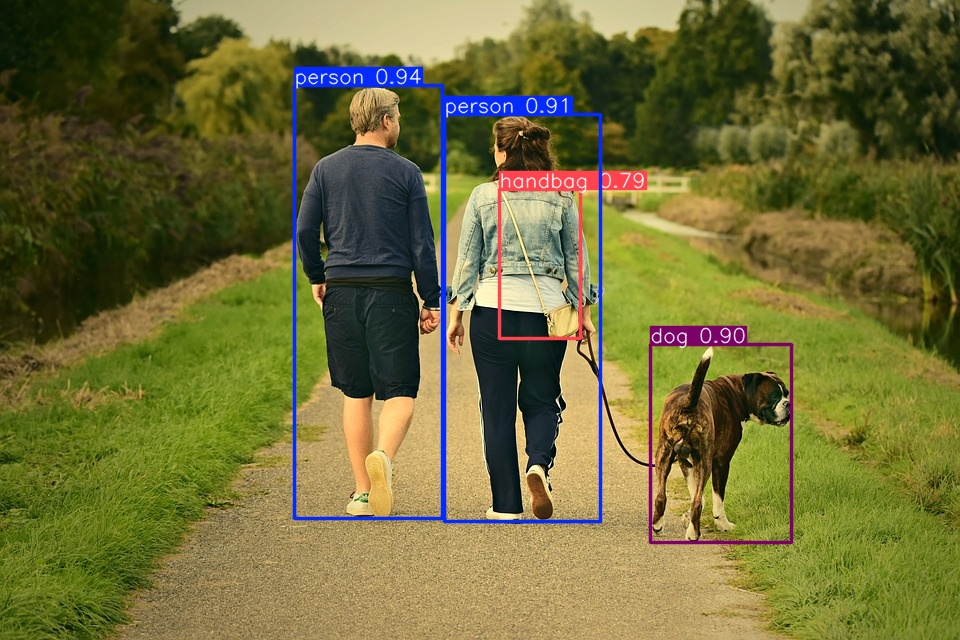

In [25]:
%cd {HOME}
Image(filename='/content/runs/detect/predict8/family-and-dog.jpg', height=600)

In [26]:
#Yolov8m
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source='/content/family-and-dog.jpg'


/content
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs

image 1/1 /content/family-and-dog.jpg: 448x640 2 persons, 1 dog, 2 handbags, 53.4ms
Speed: 2.9ms preprocess, 53.4ms inference, 154.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


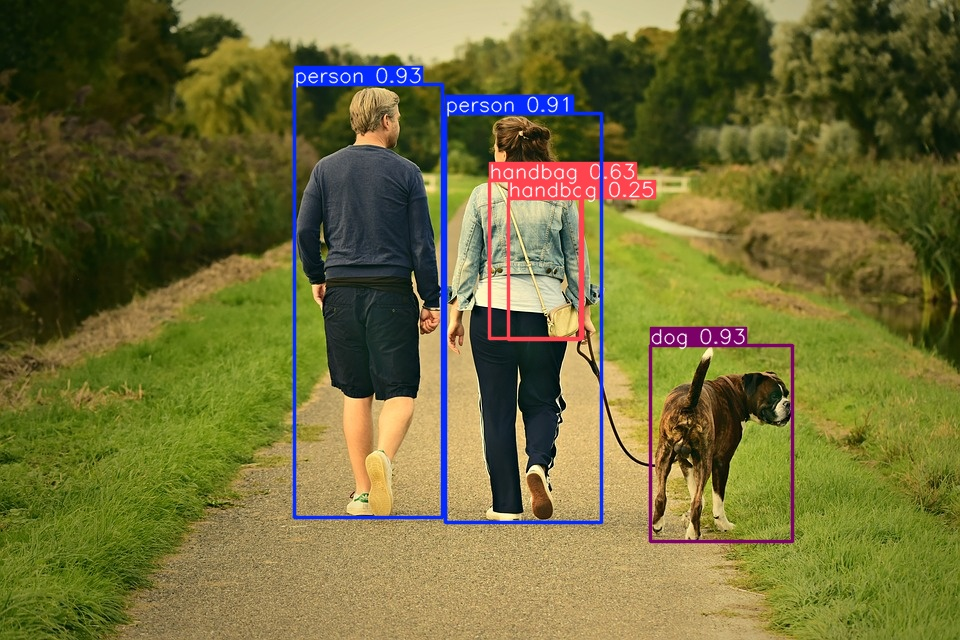

In [27]:
%cd {HOME}
Image(filename='/content/runs/detect/predict9/family-and-dog.jpg', height=600)

## Custom Training

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
%cd /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8

/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8


In [33]:
%cd /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=70 imgsz=416 plots=True

/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [55]:
!1s

/bin/bash: line 1: 1s: command not found


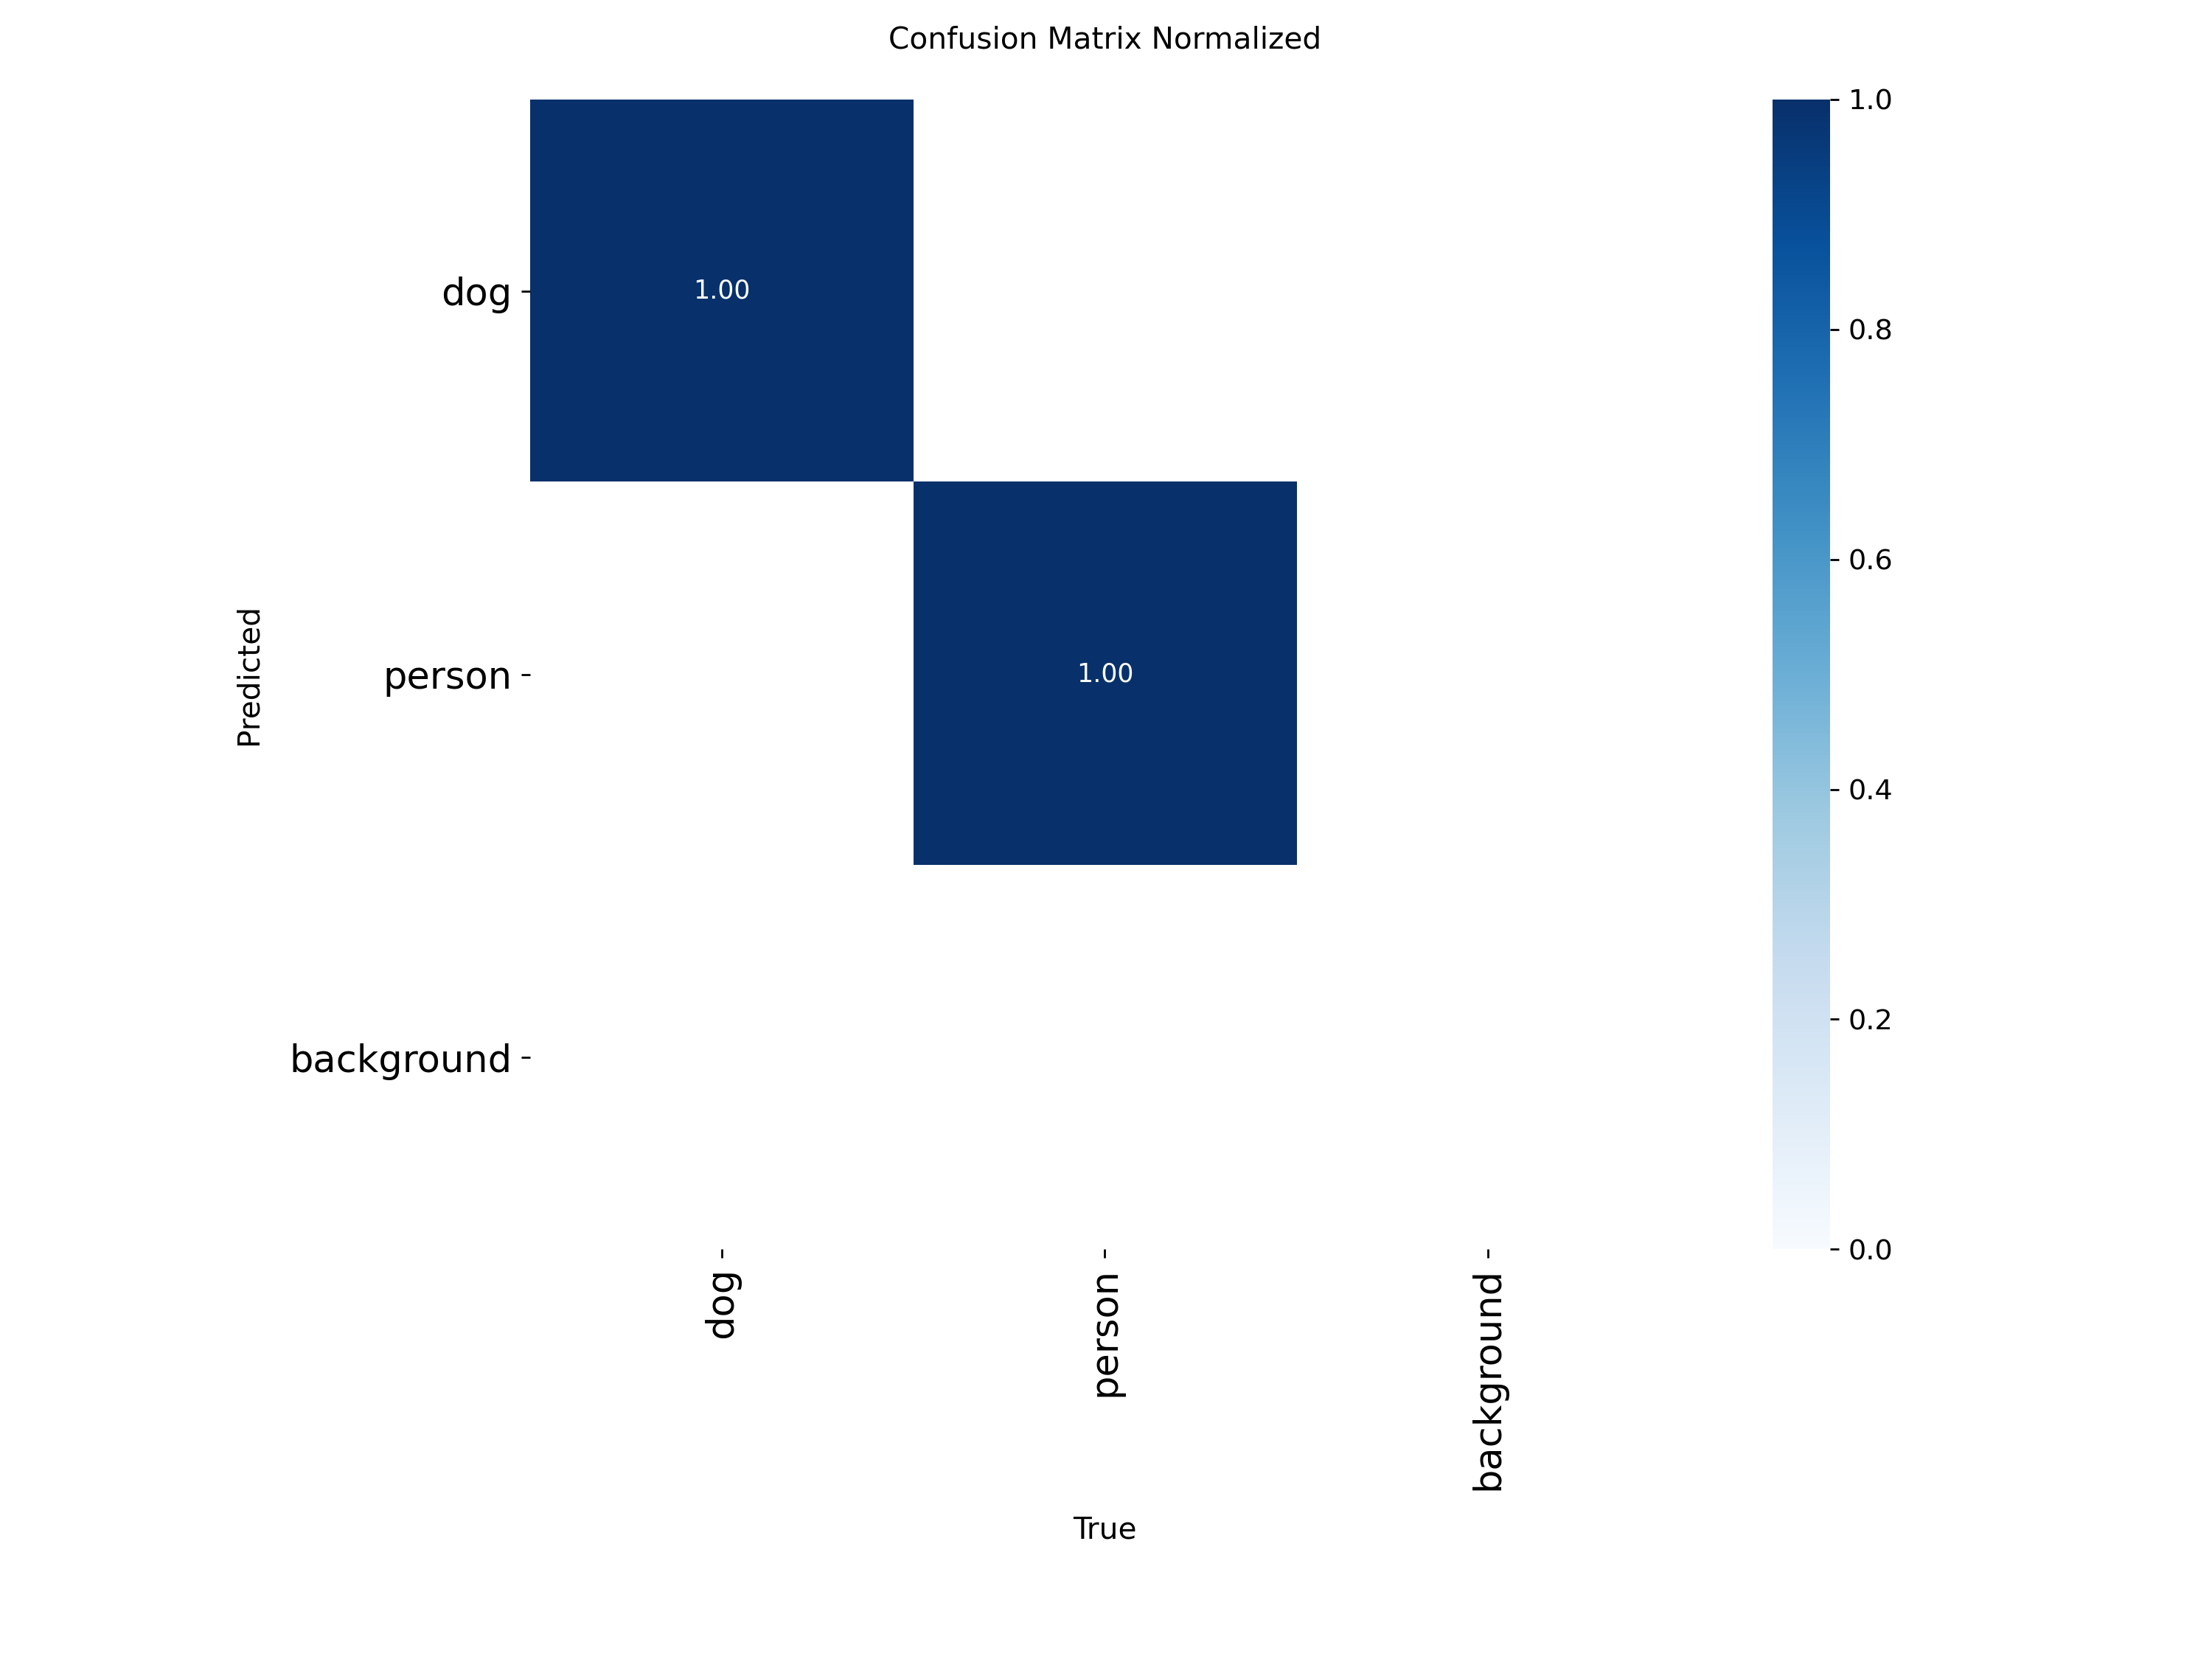

In [56]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/confusion_matrix_normalized.png', width=600)

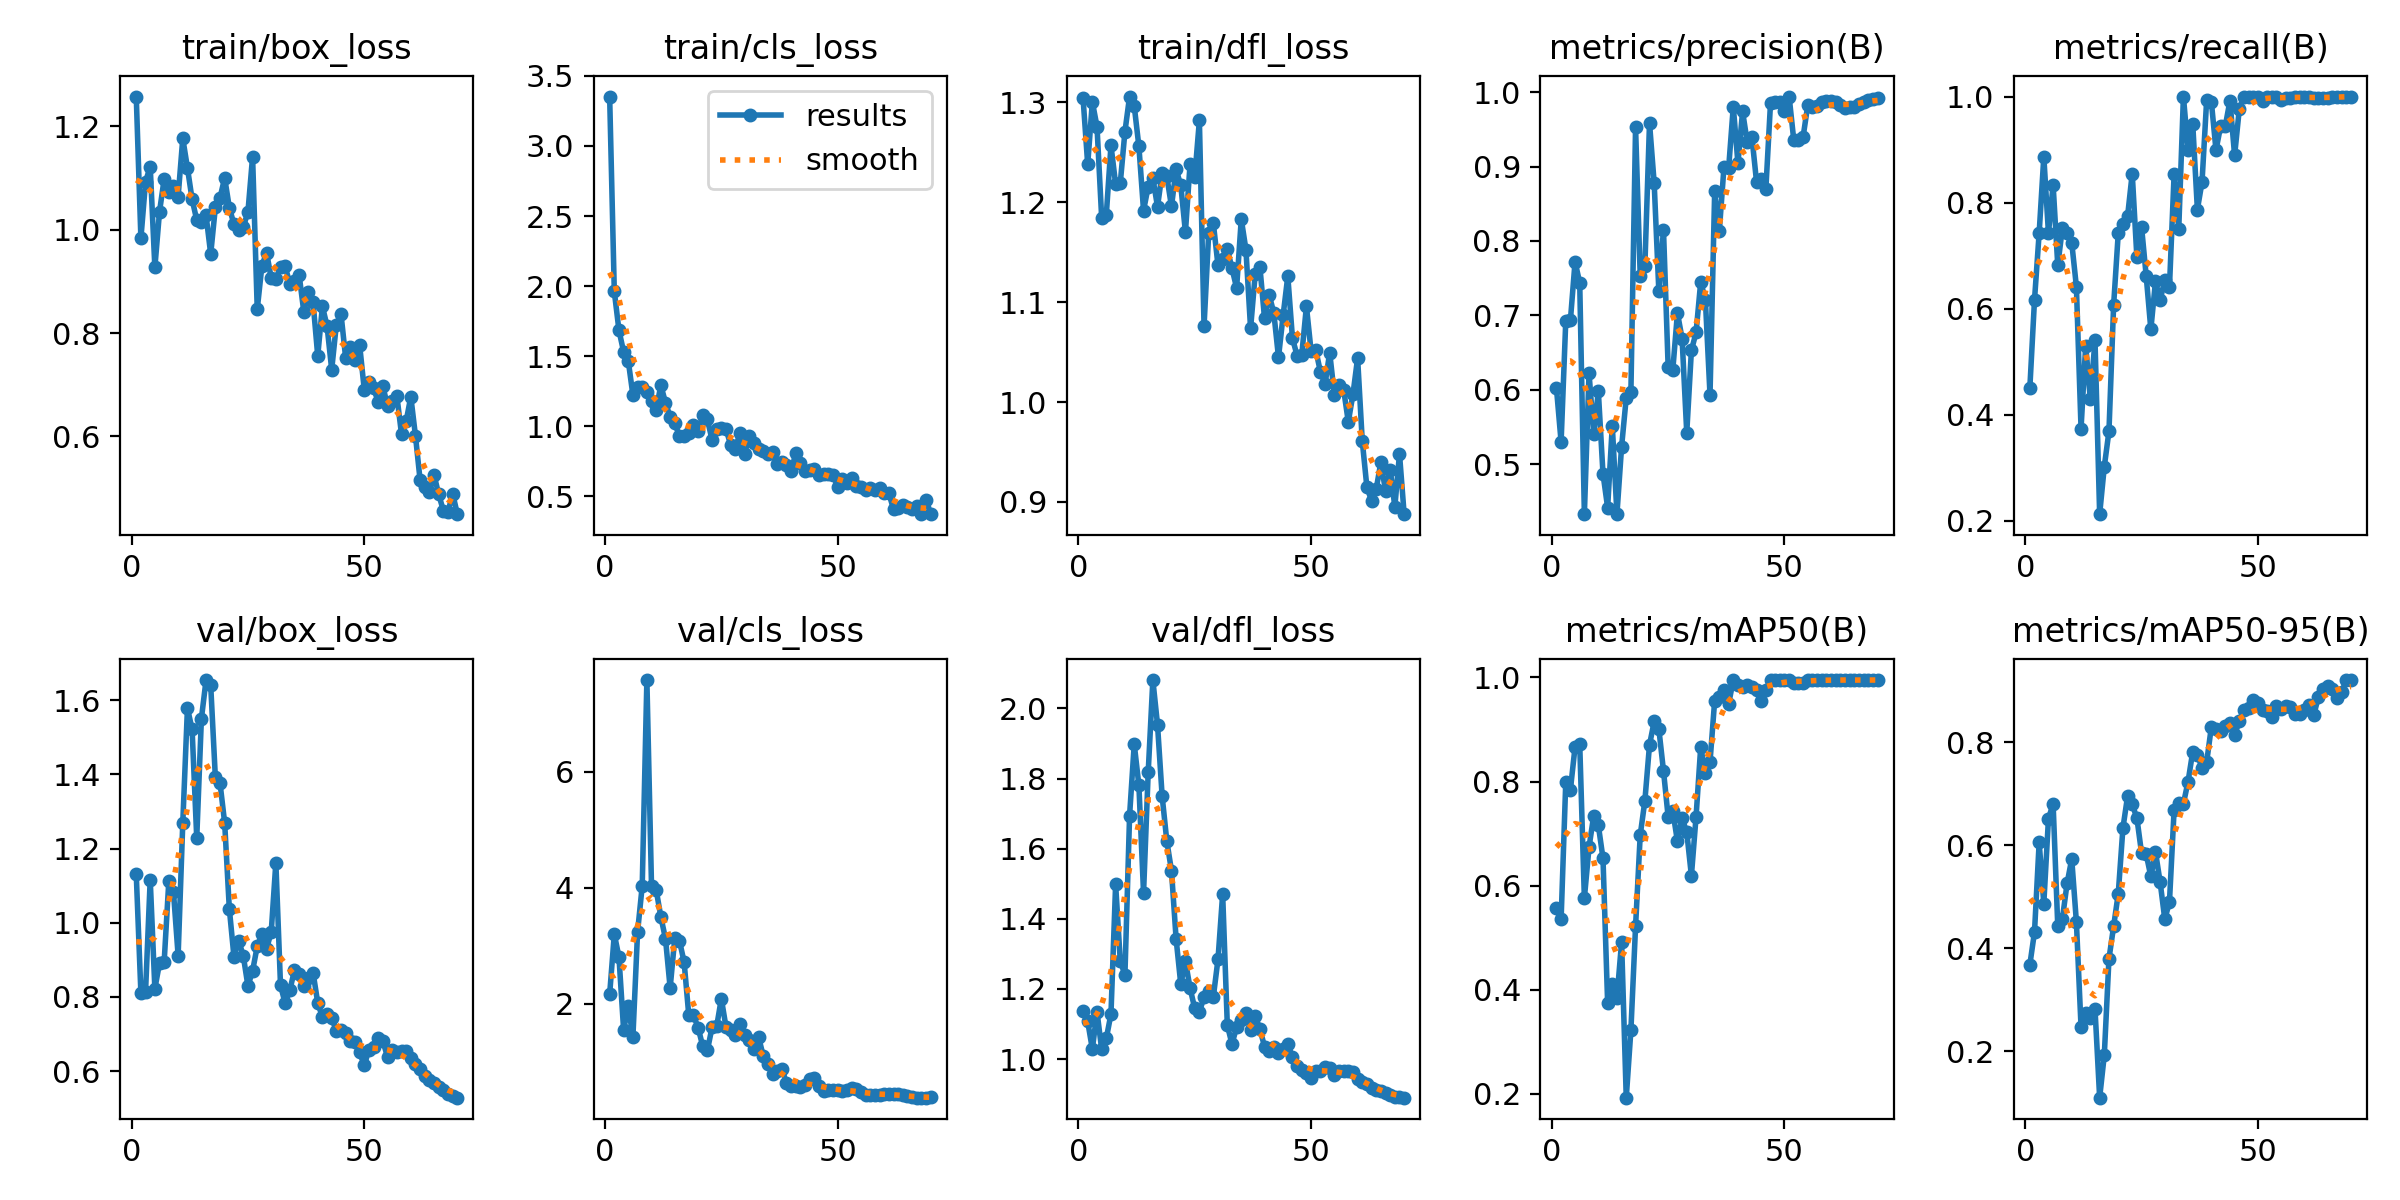

In [57]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/results.png', width=600)

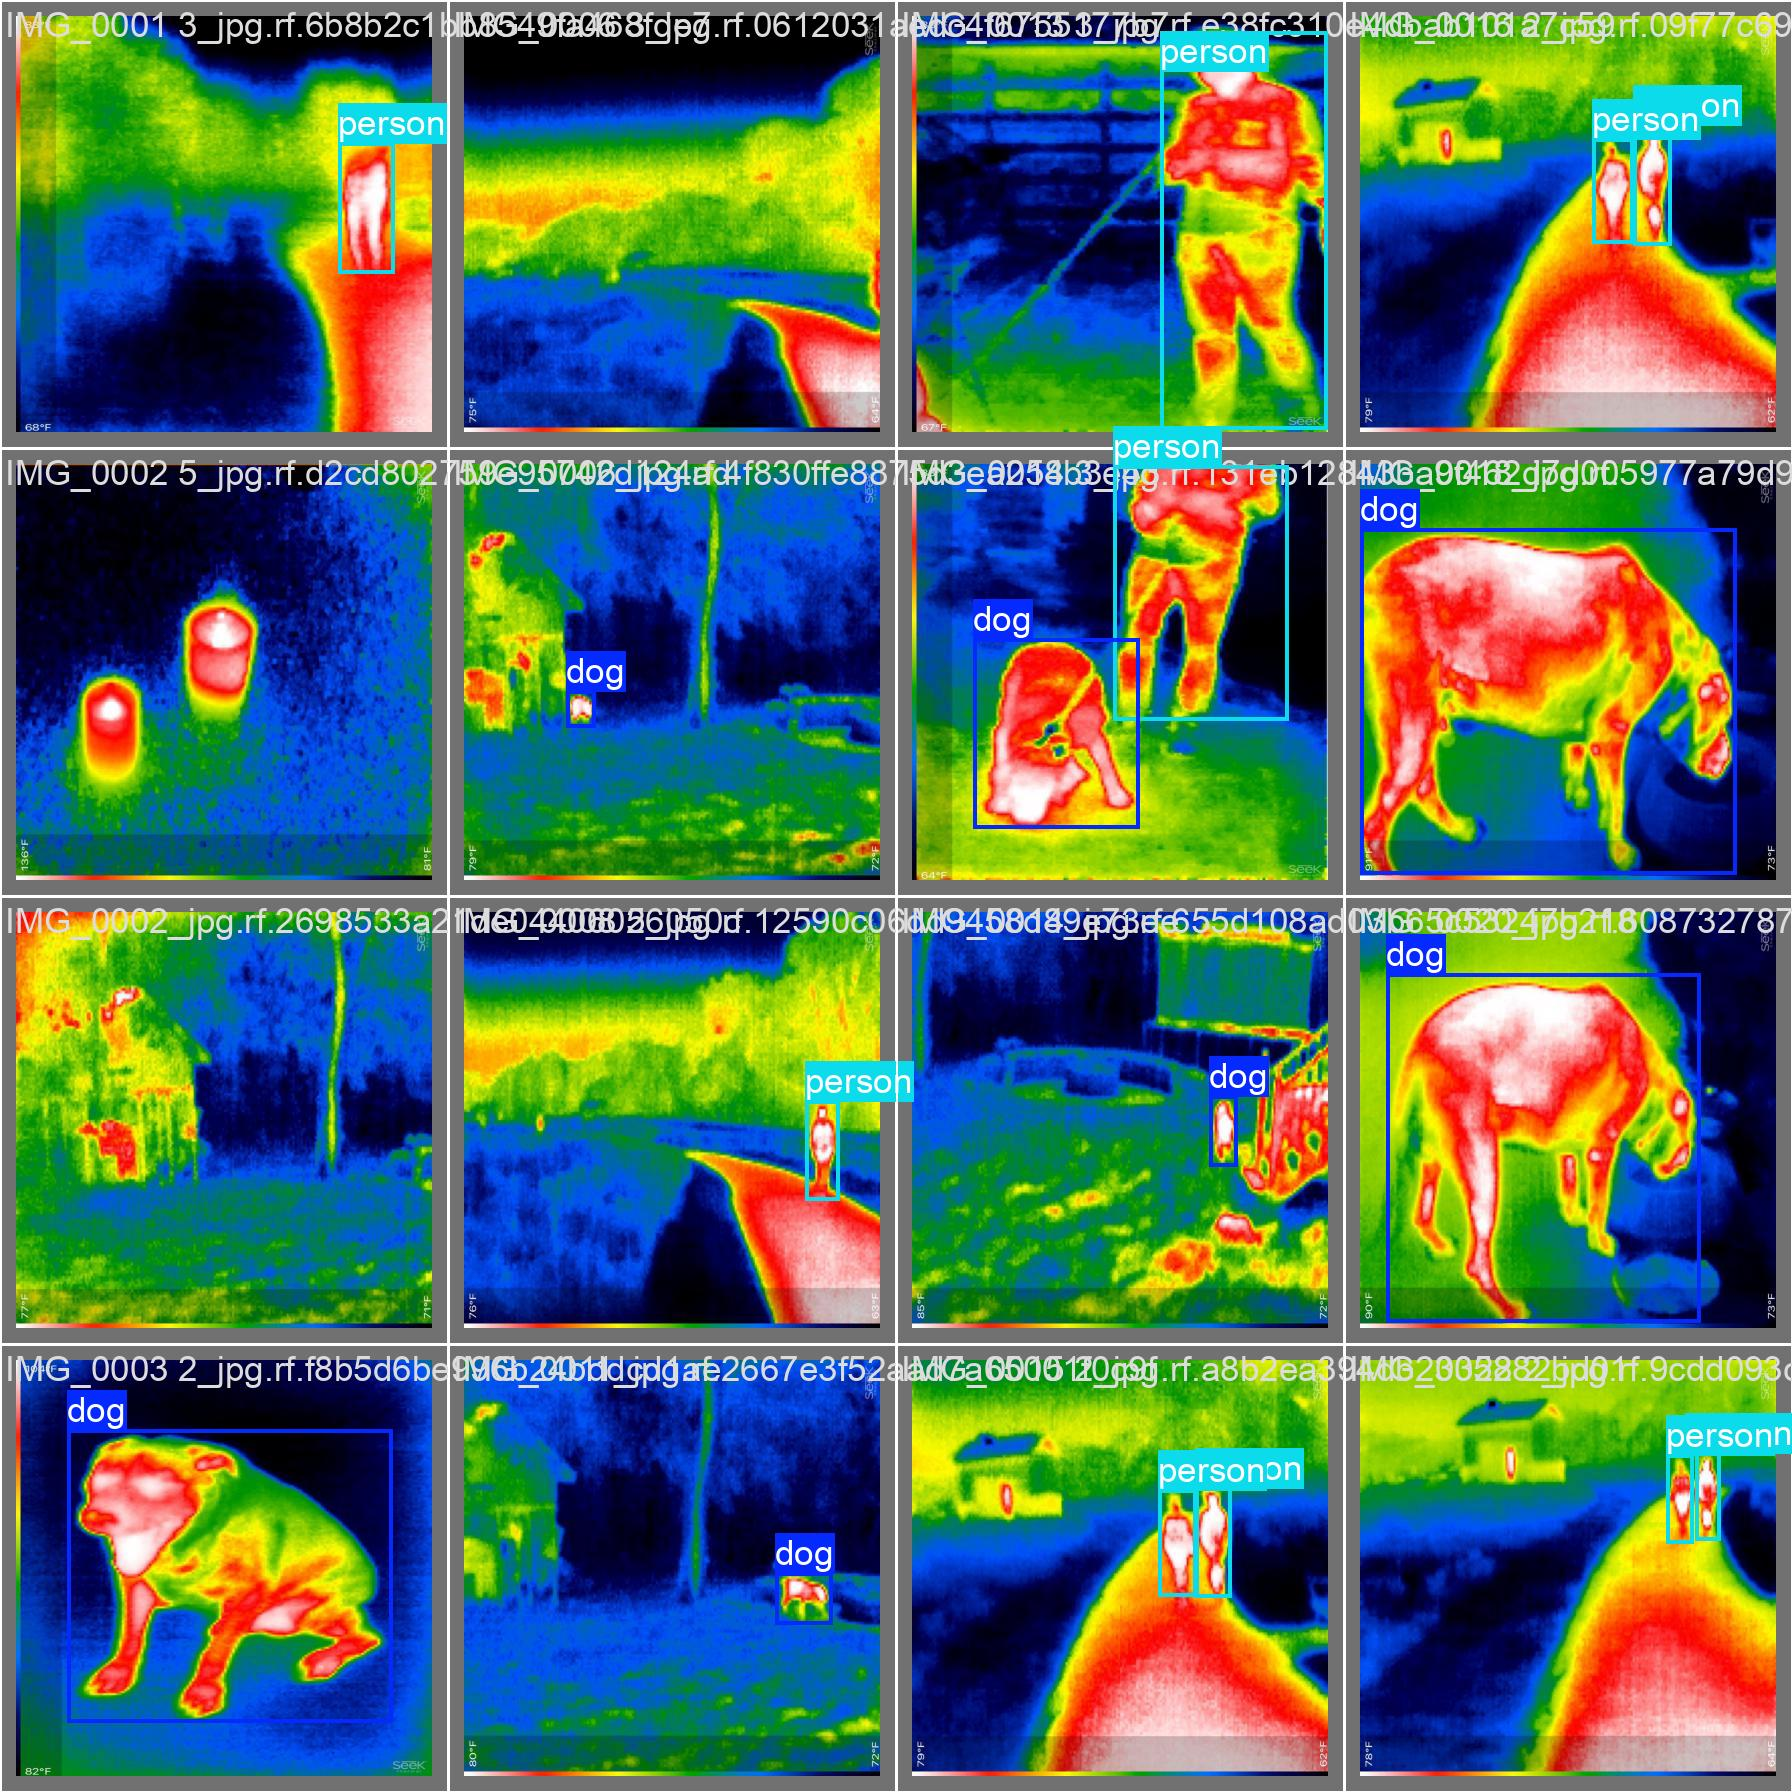

In [58]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/val_batch0_labels.jpg', width=600)

## Validate Custom Model

In [59]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 12.7±3.7 MB/s, size: 24.2 KB)
val: Scanning /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.84it/s]
                   all         20         20      0.993          1      0.995      0.921
                   dog          9          9      0.997          1      0.995      0.952
                person          8         11      0.988          1      0.995       0.89
Speed: 2.7ms preprocess, 14.2ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


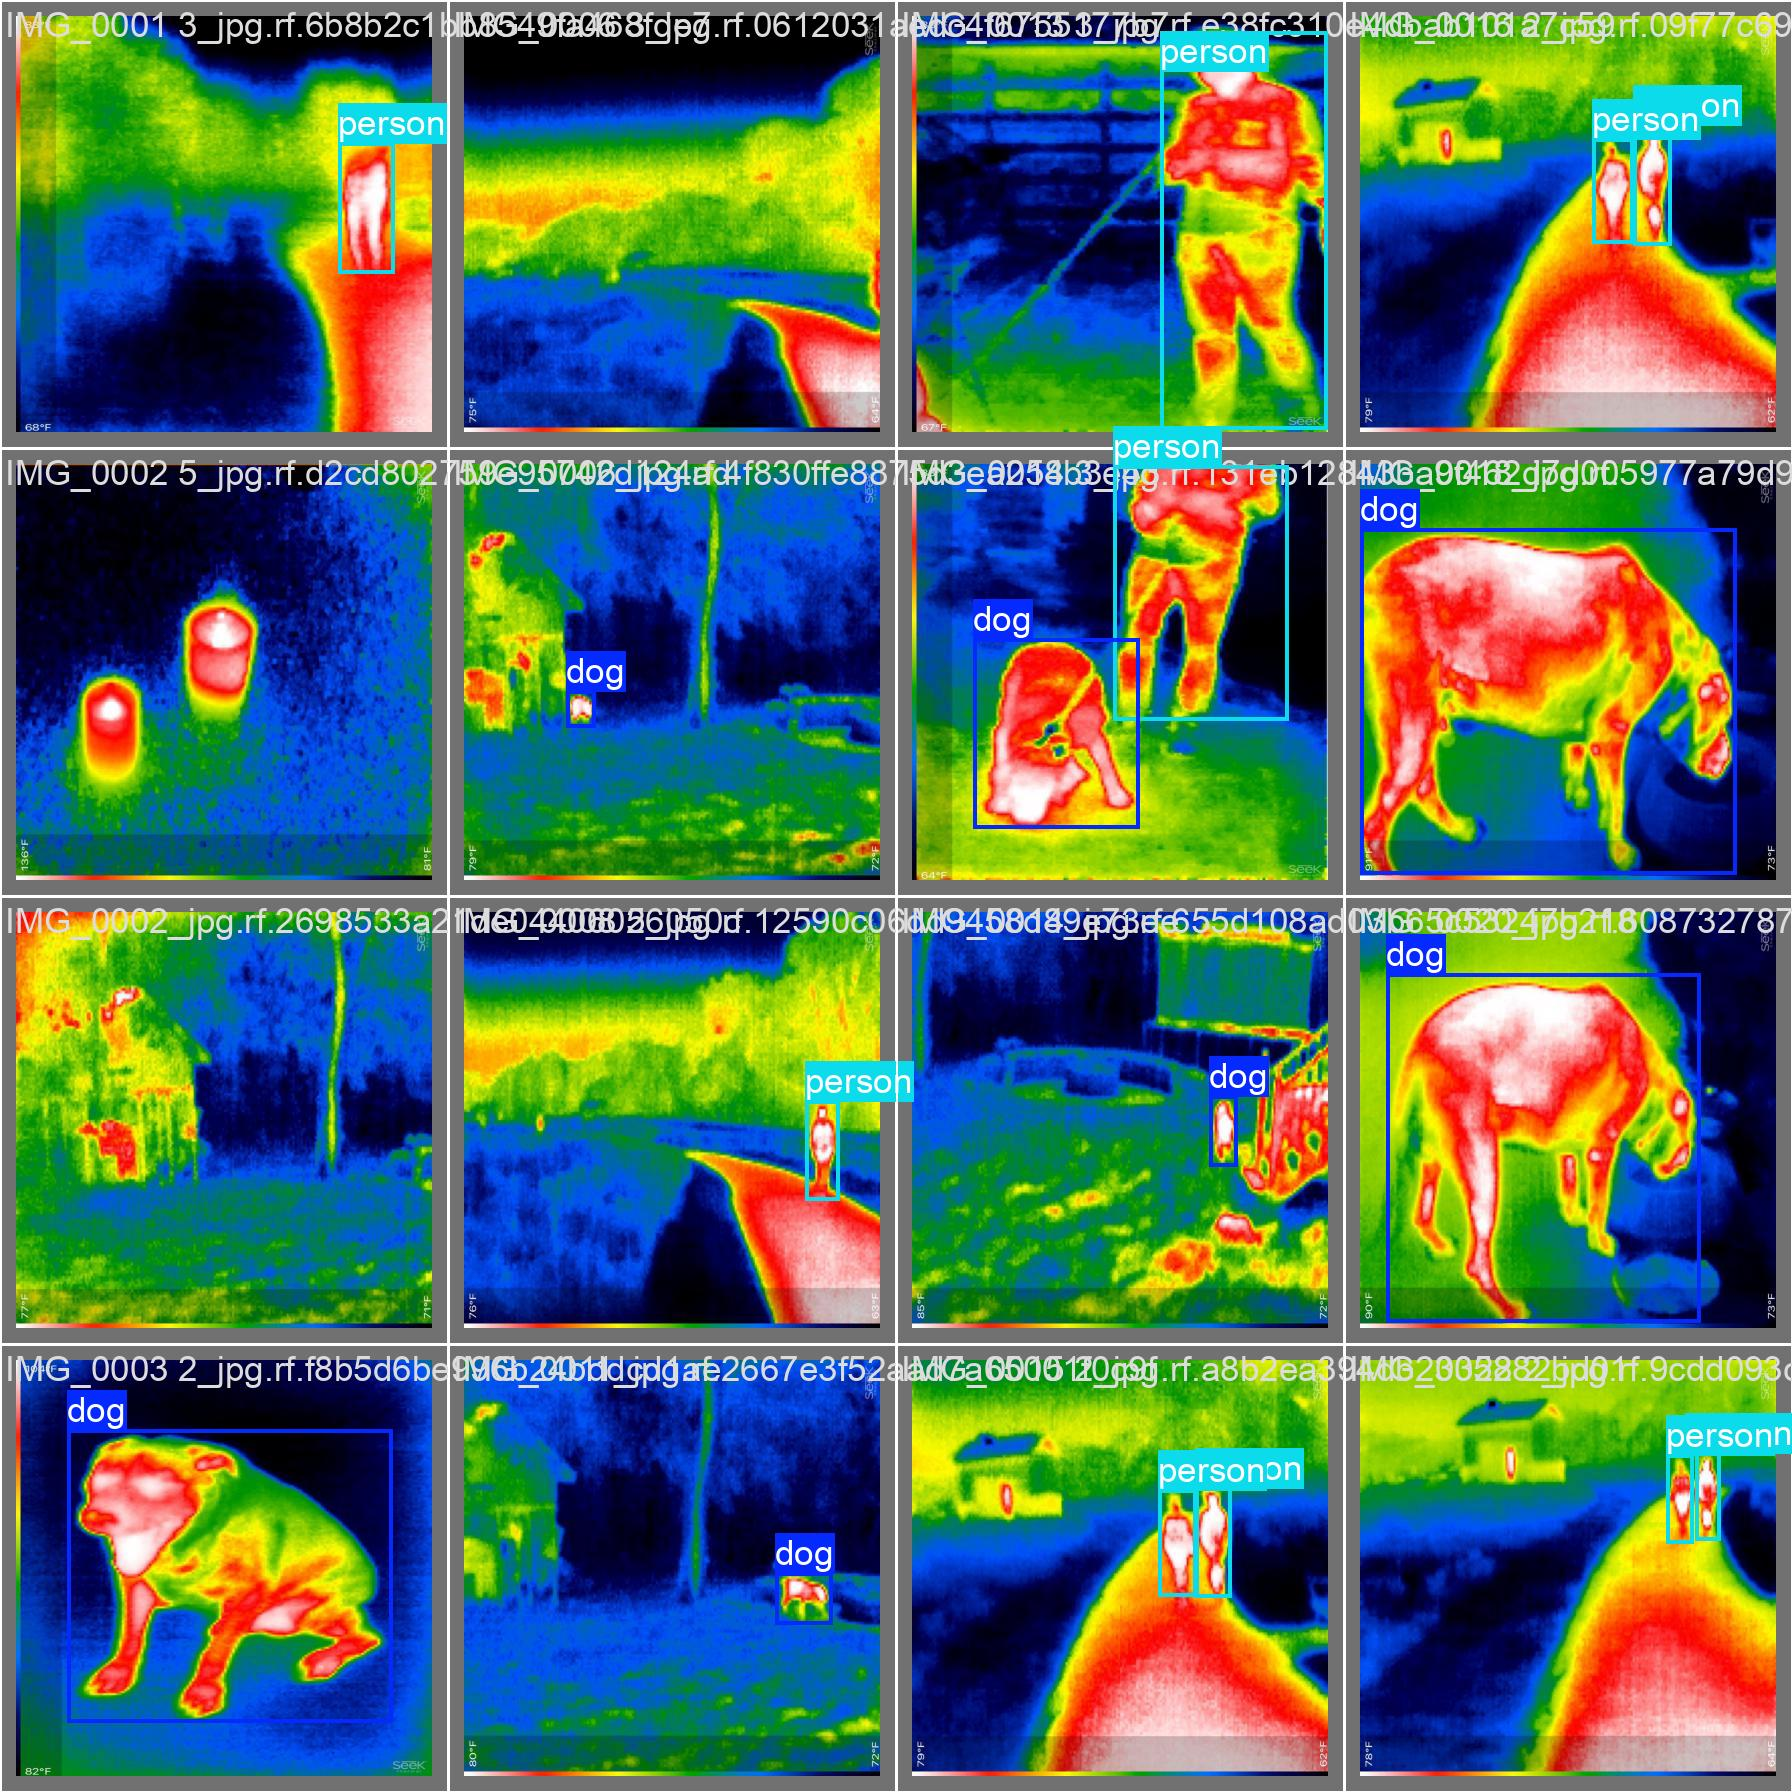

In [60]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/val_batch0_labels.jpg', width=600)

## Inference with Custom Model

In [61]:
!yolo task=detect mode=predict \
model="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/weights/best.pt" \
conf=0.25 \
source="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images"
source="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images"

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0002 4_jpg.rf.6d1c60bf9f8779f13291c0547ea1ff70.jpg: 416x416 2 persons, 10.8ms
image 2/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 416x416 1 dog, 1 person, 10.2ms
image 3/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0009_jpg.rf.ecdb212f7d7796e682a87e2e1d6e907e.jpg: 416x416 1 dog, 10.2ms
image 4/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0012 2_jpg.rf.4c8e033ea0189ebd28c4e3751edd7a6a.jpg: 416x416 2 persons, 10.2ms
image 5/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0022_jpg.rf.c89662890a0f5d8

**NOTE:** Let's take a look at few results.

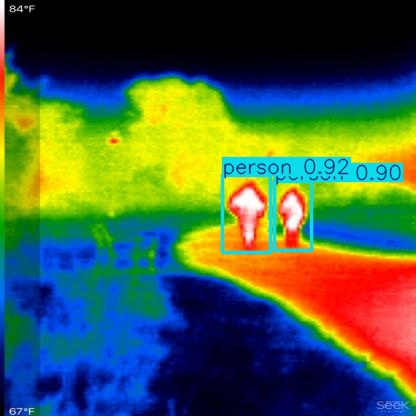

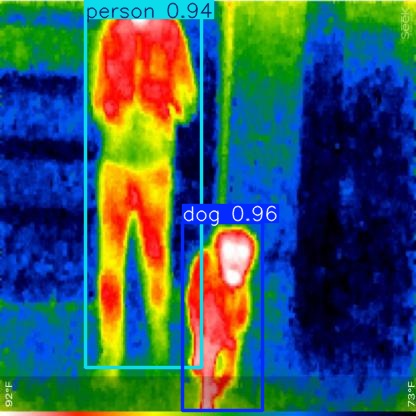

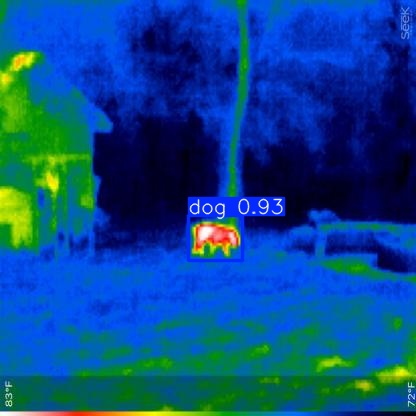

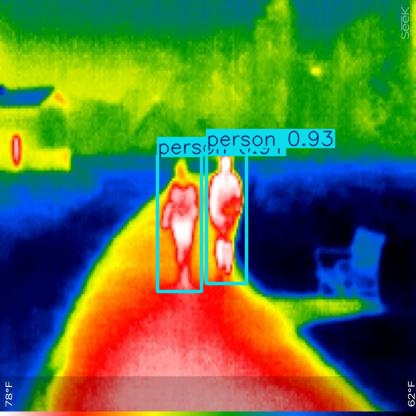

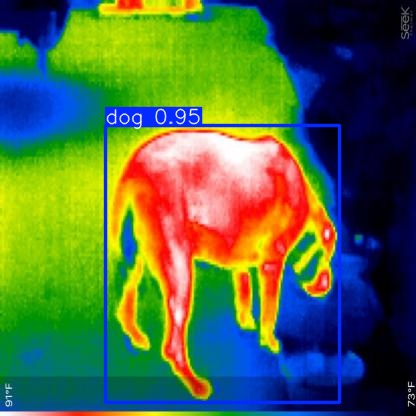

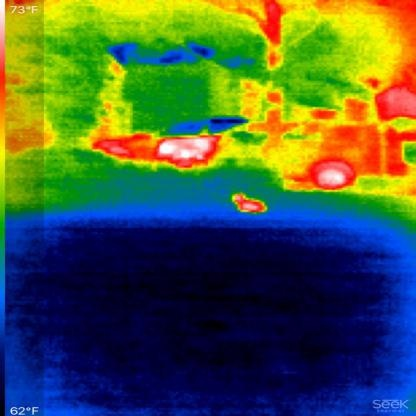

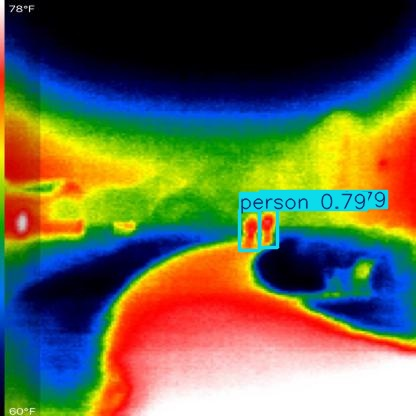

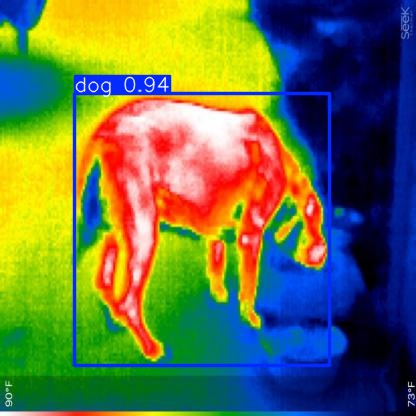

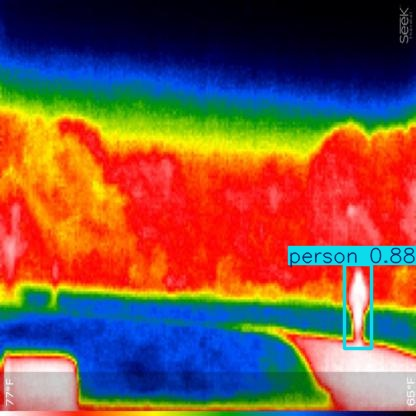

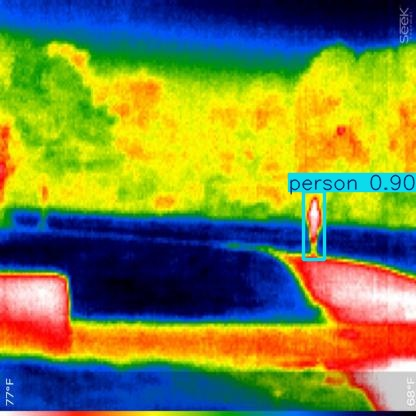

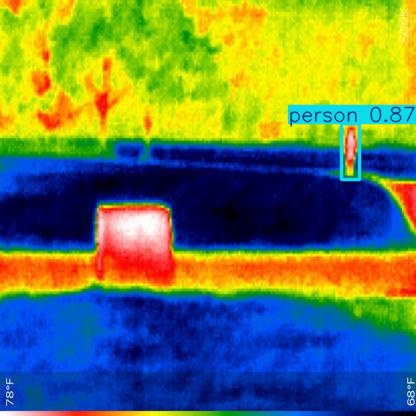

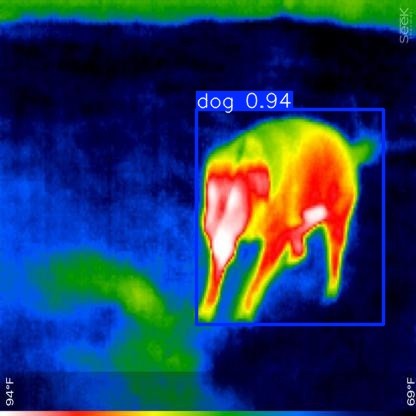

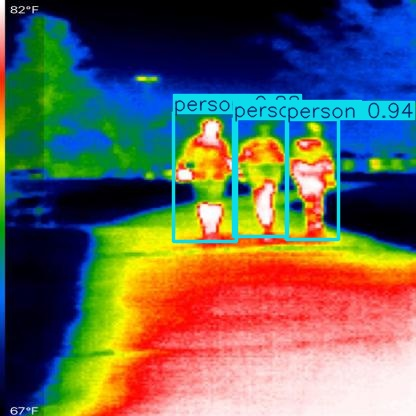

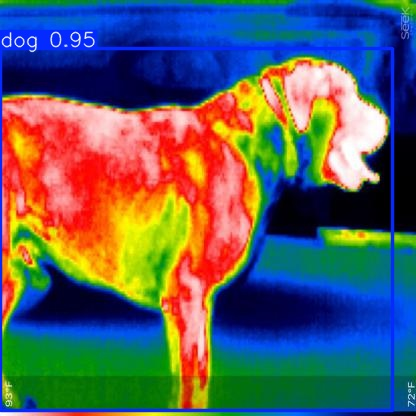

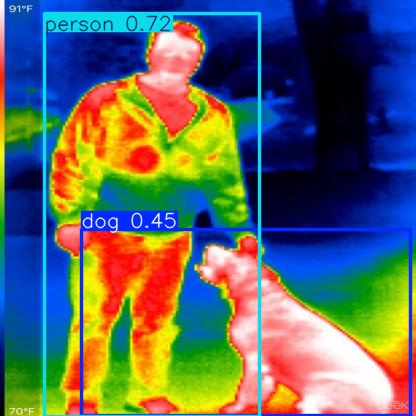

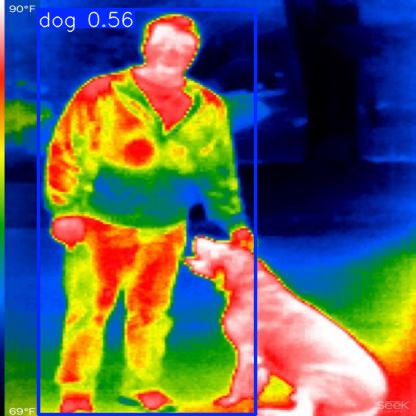

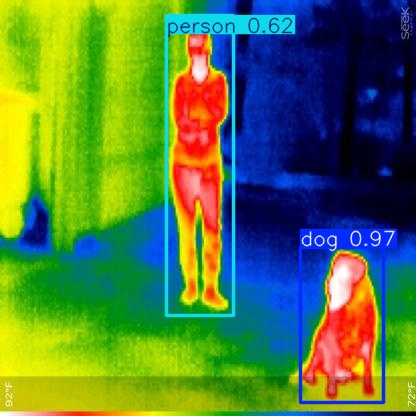

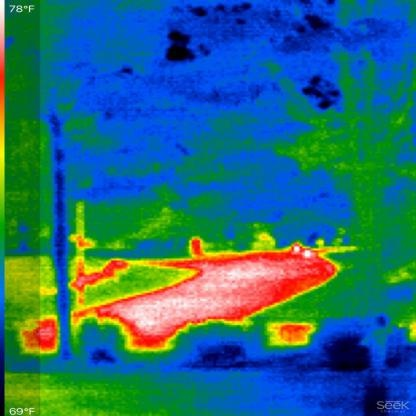

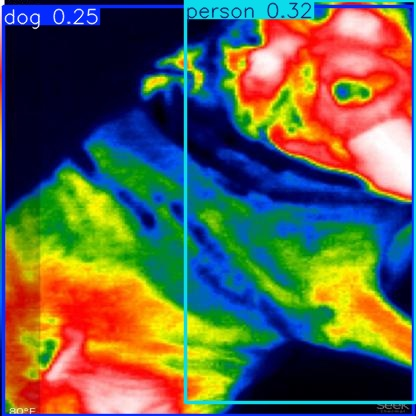

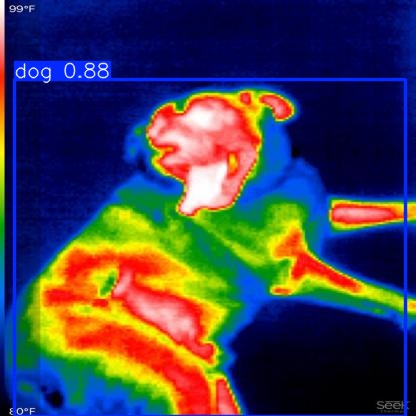

In [62]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [63]:
#yolov8m on cutom dataset

%cd /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8

!yolo task=detect mode=train model=yolov8m.pt data= data.yaml epochs=70 imgsz=416 plots=True

/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8
Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [64]:
!1s /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4

/bin/bash: line 1: 1s: command not found


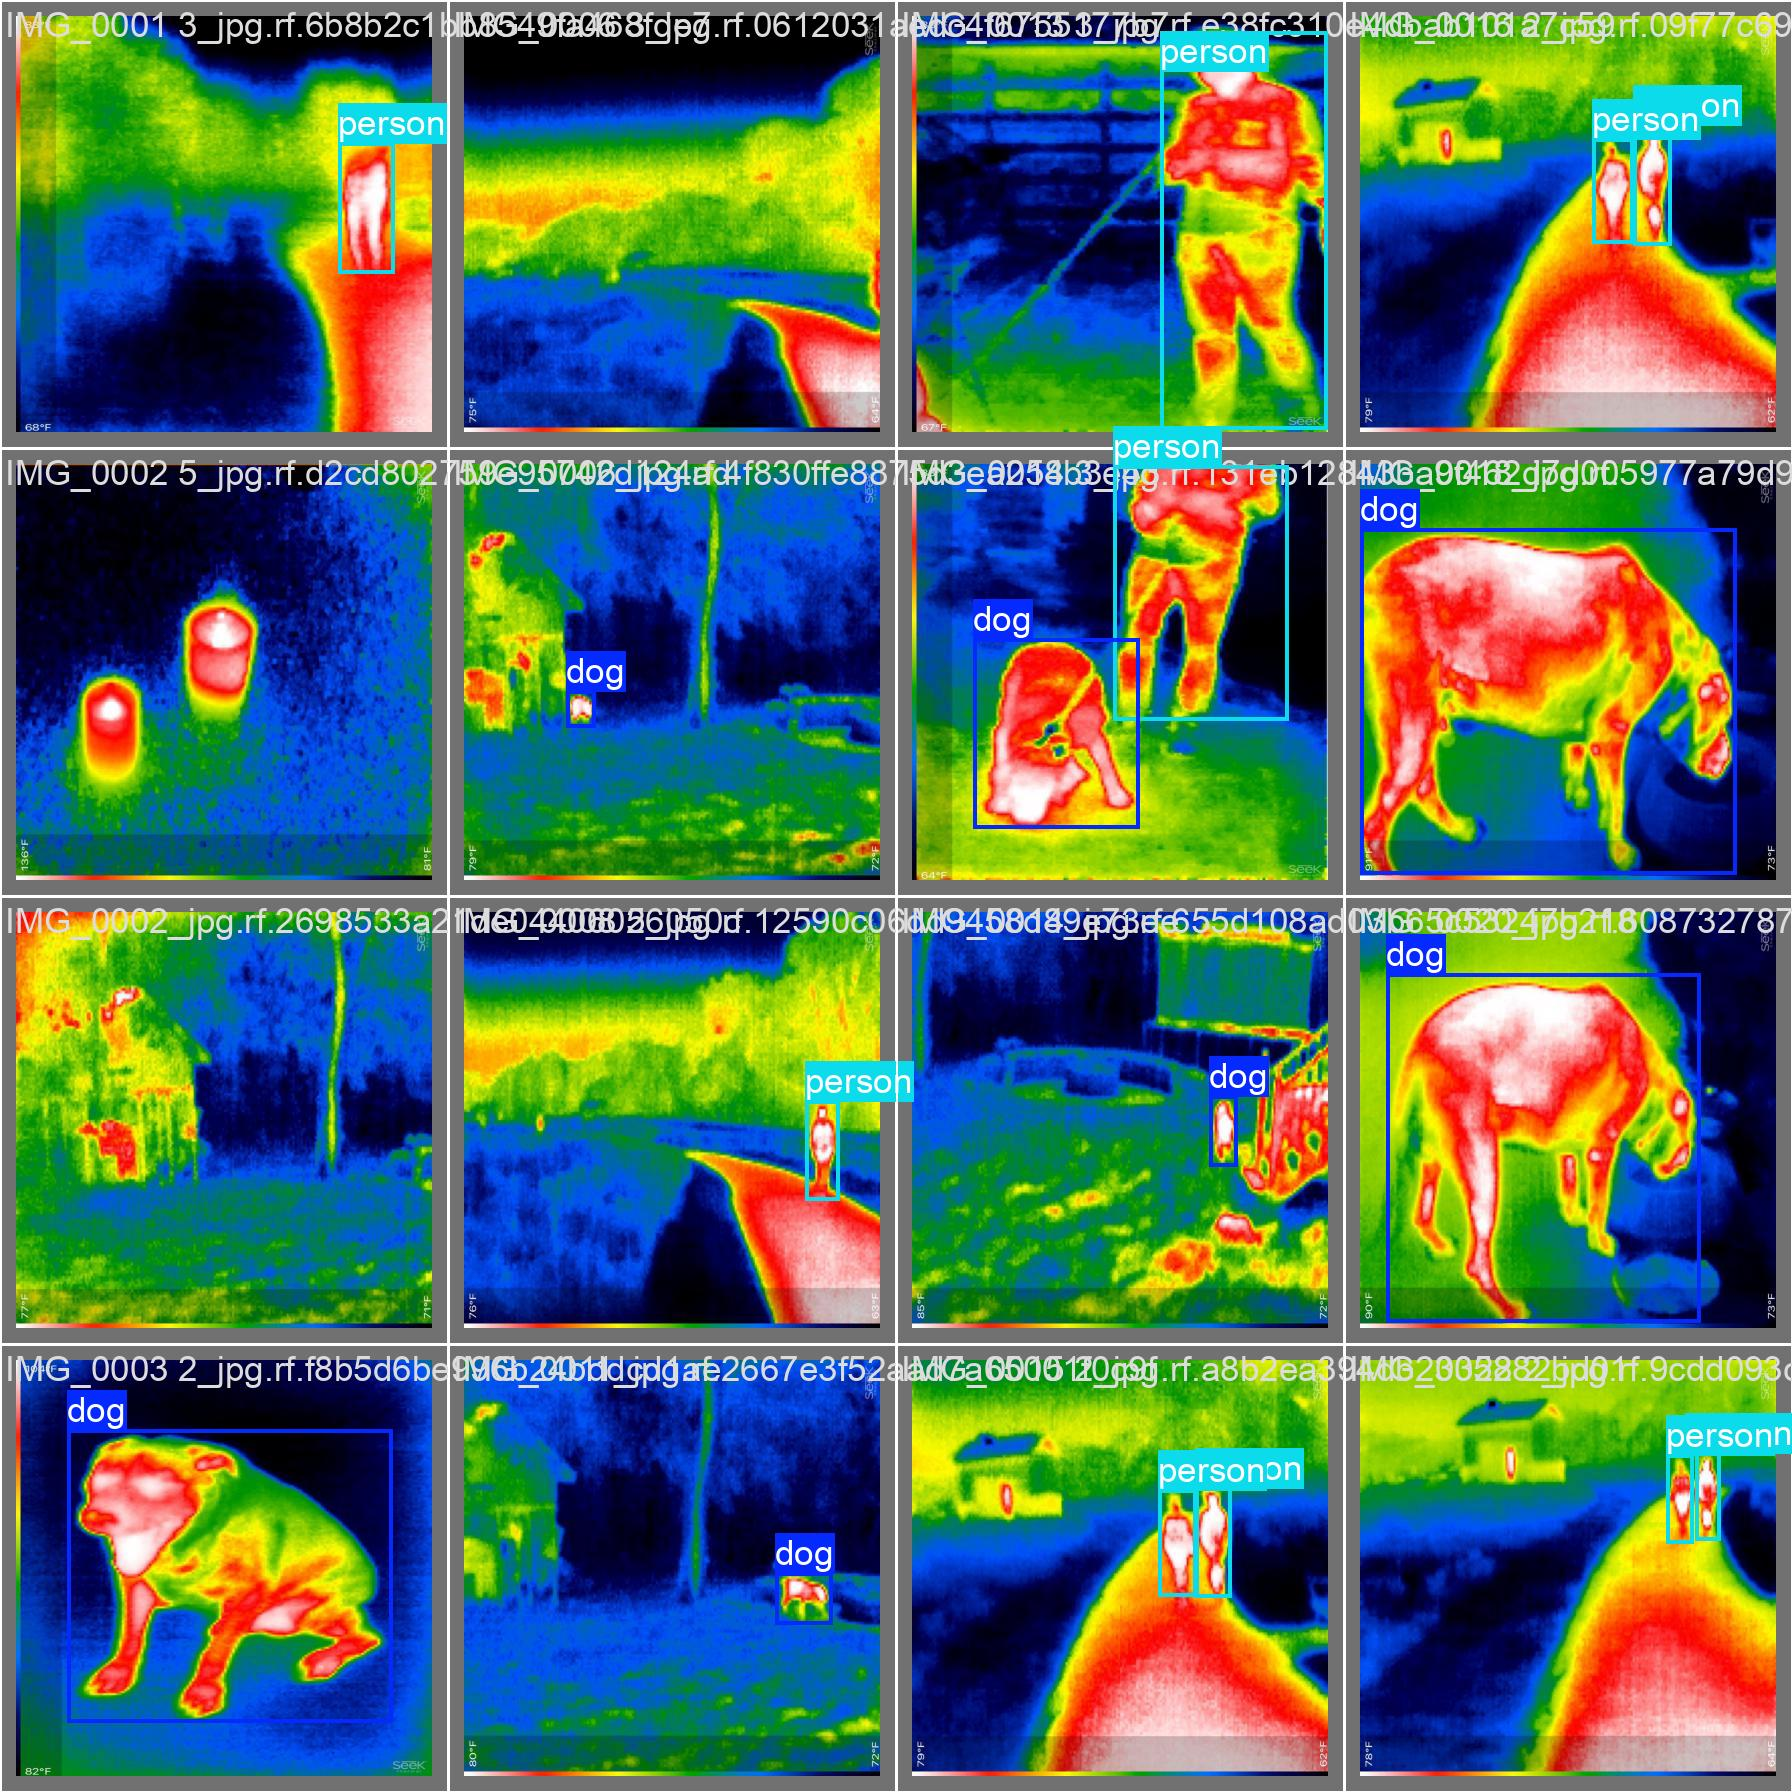

In [65]:
# prompt: next

Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/confusion_matrix_normalized.png', width=600)
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/results.png', width=600)
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/val_batch0_labels.jpg', width=600)

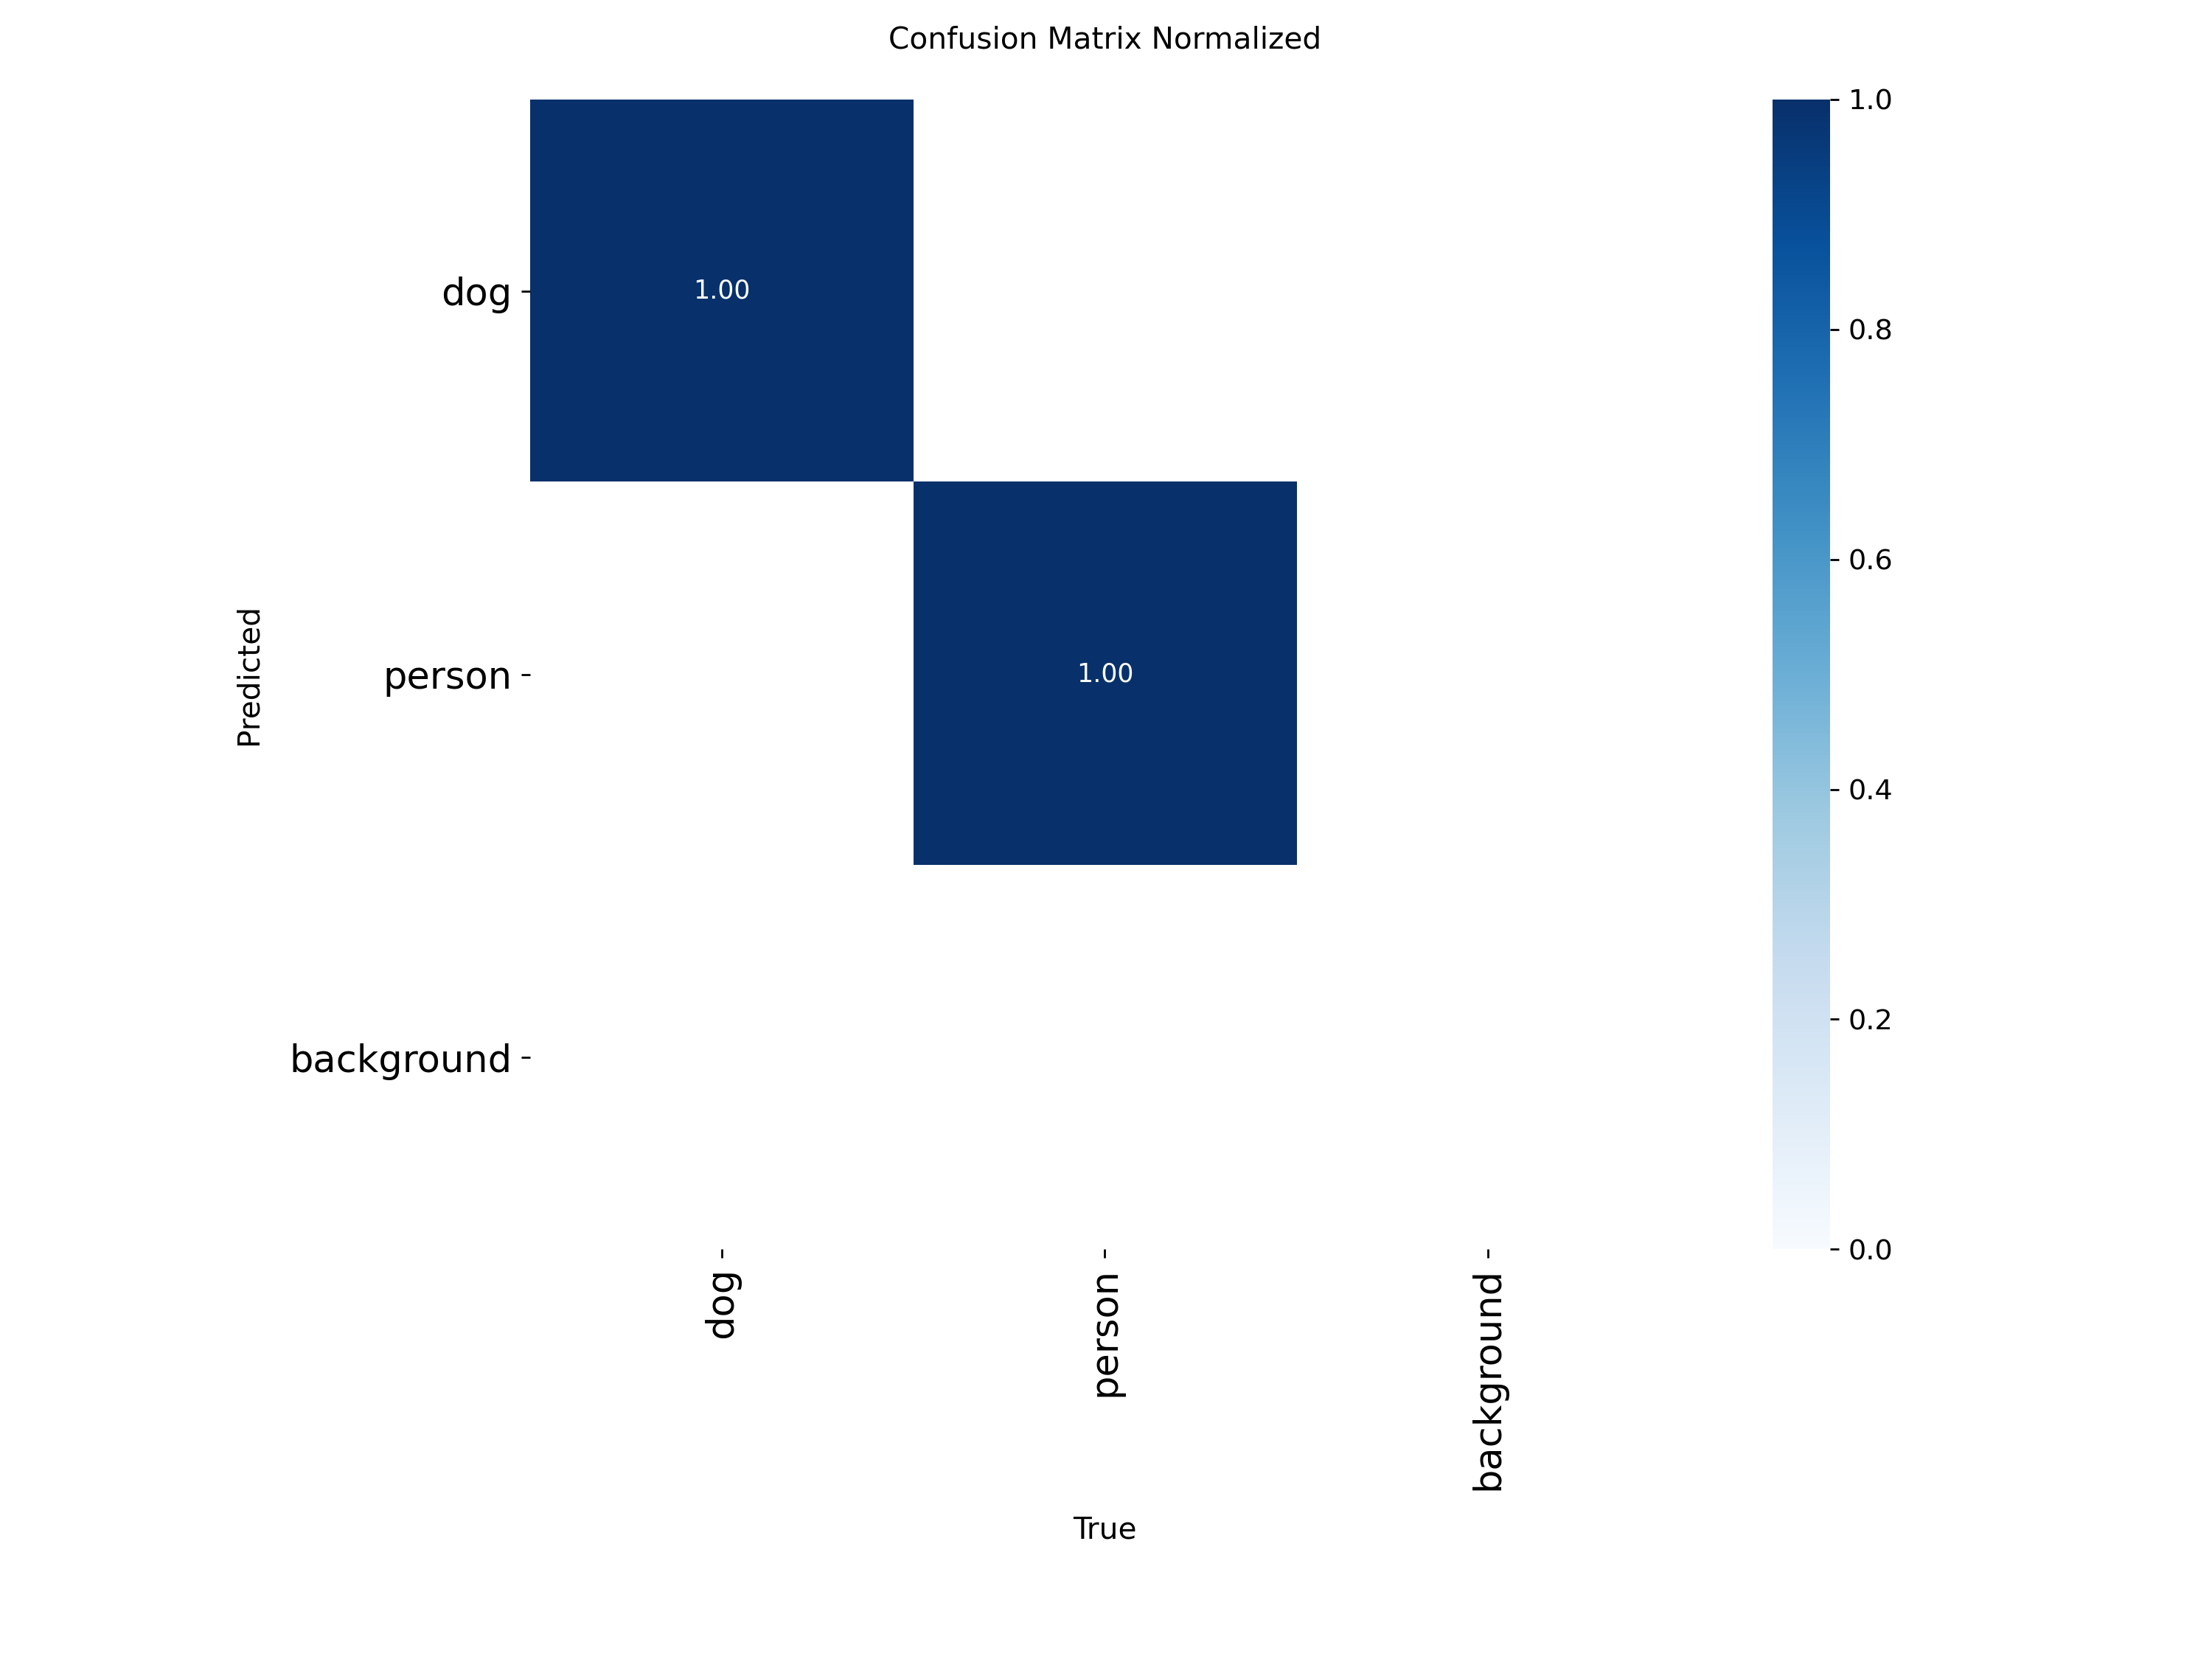

In [66]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/confusion_matrix_normalized.png', width=600)

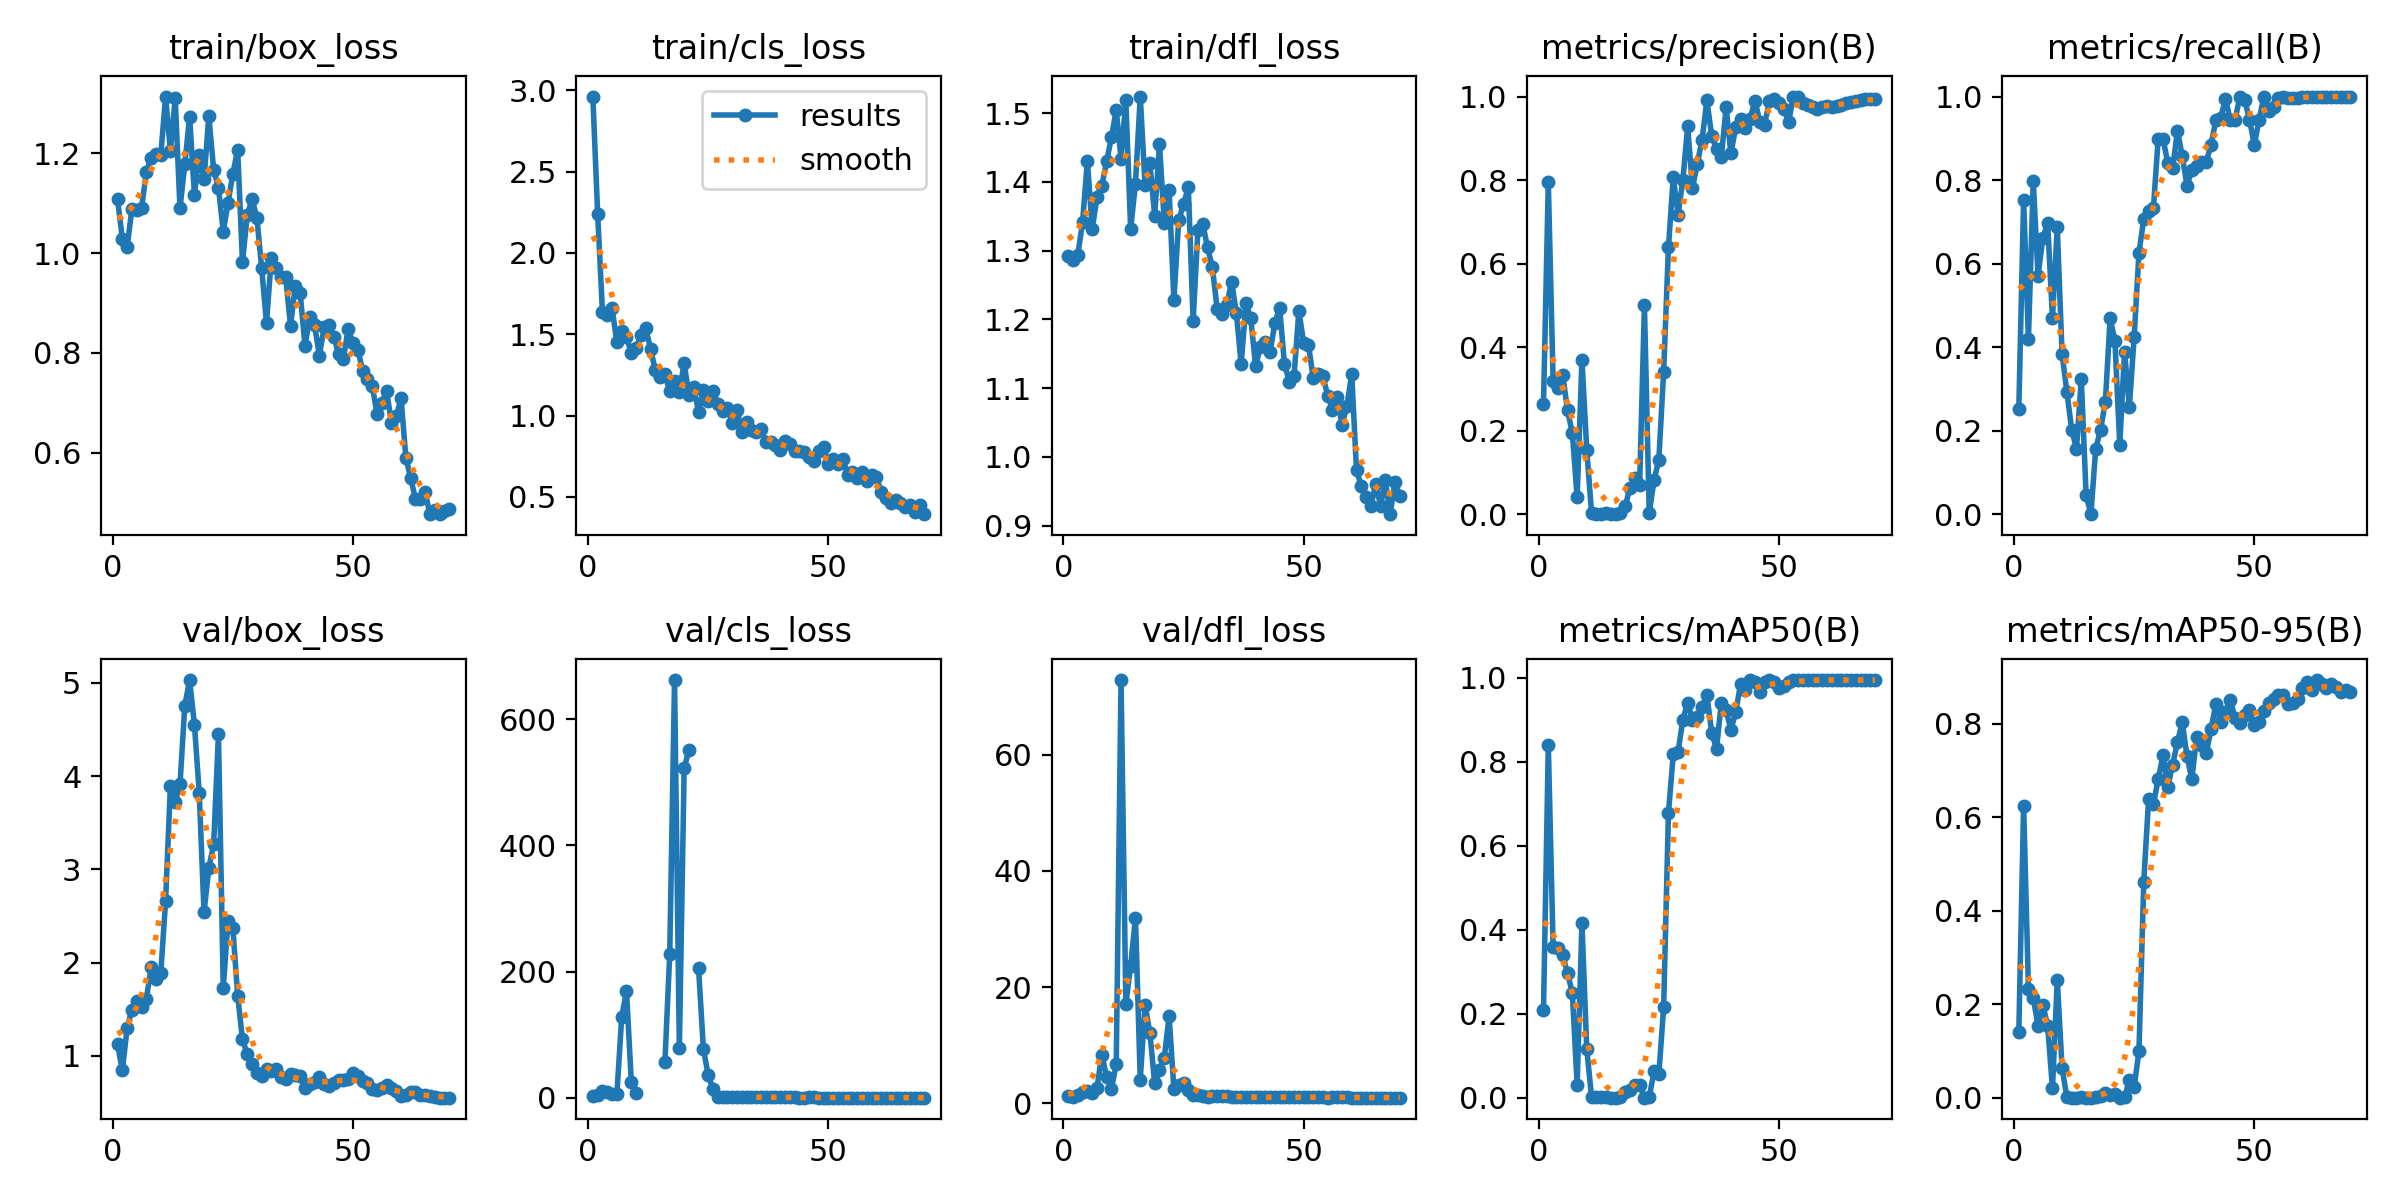

In [67]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/results.png', width=600)

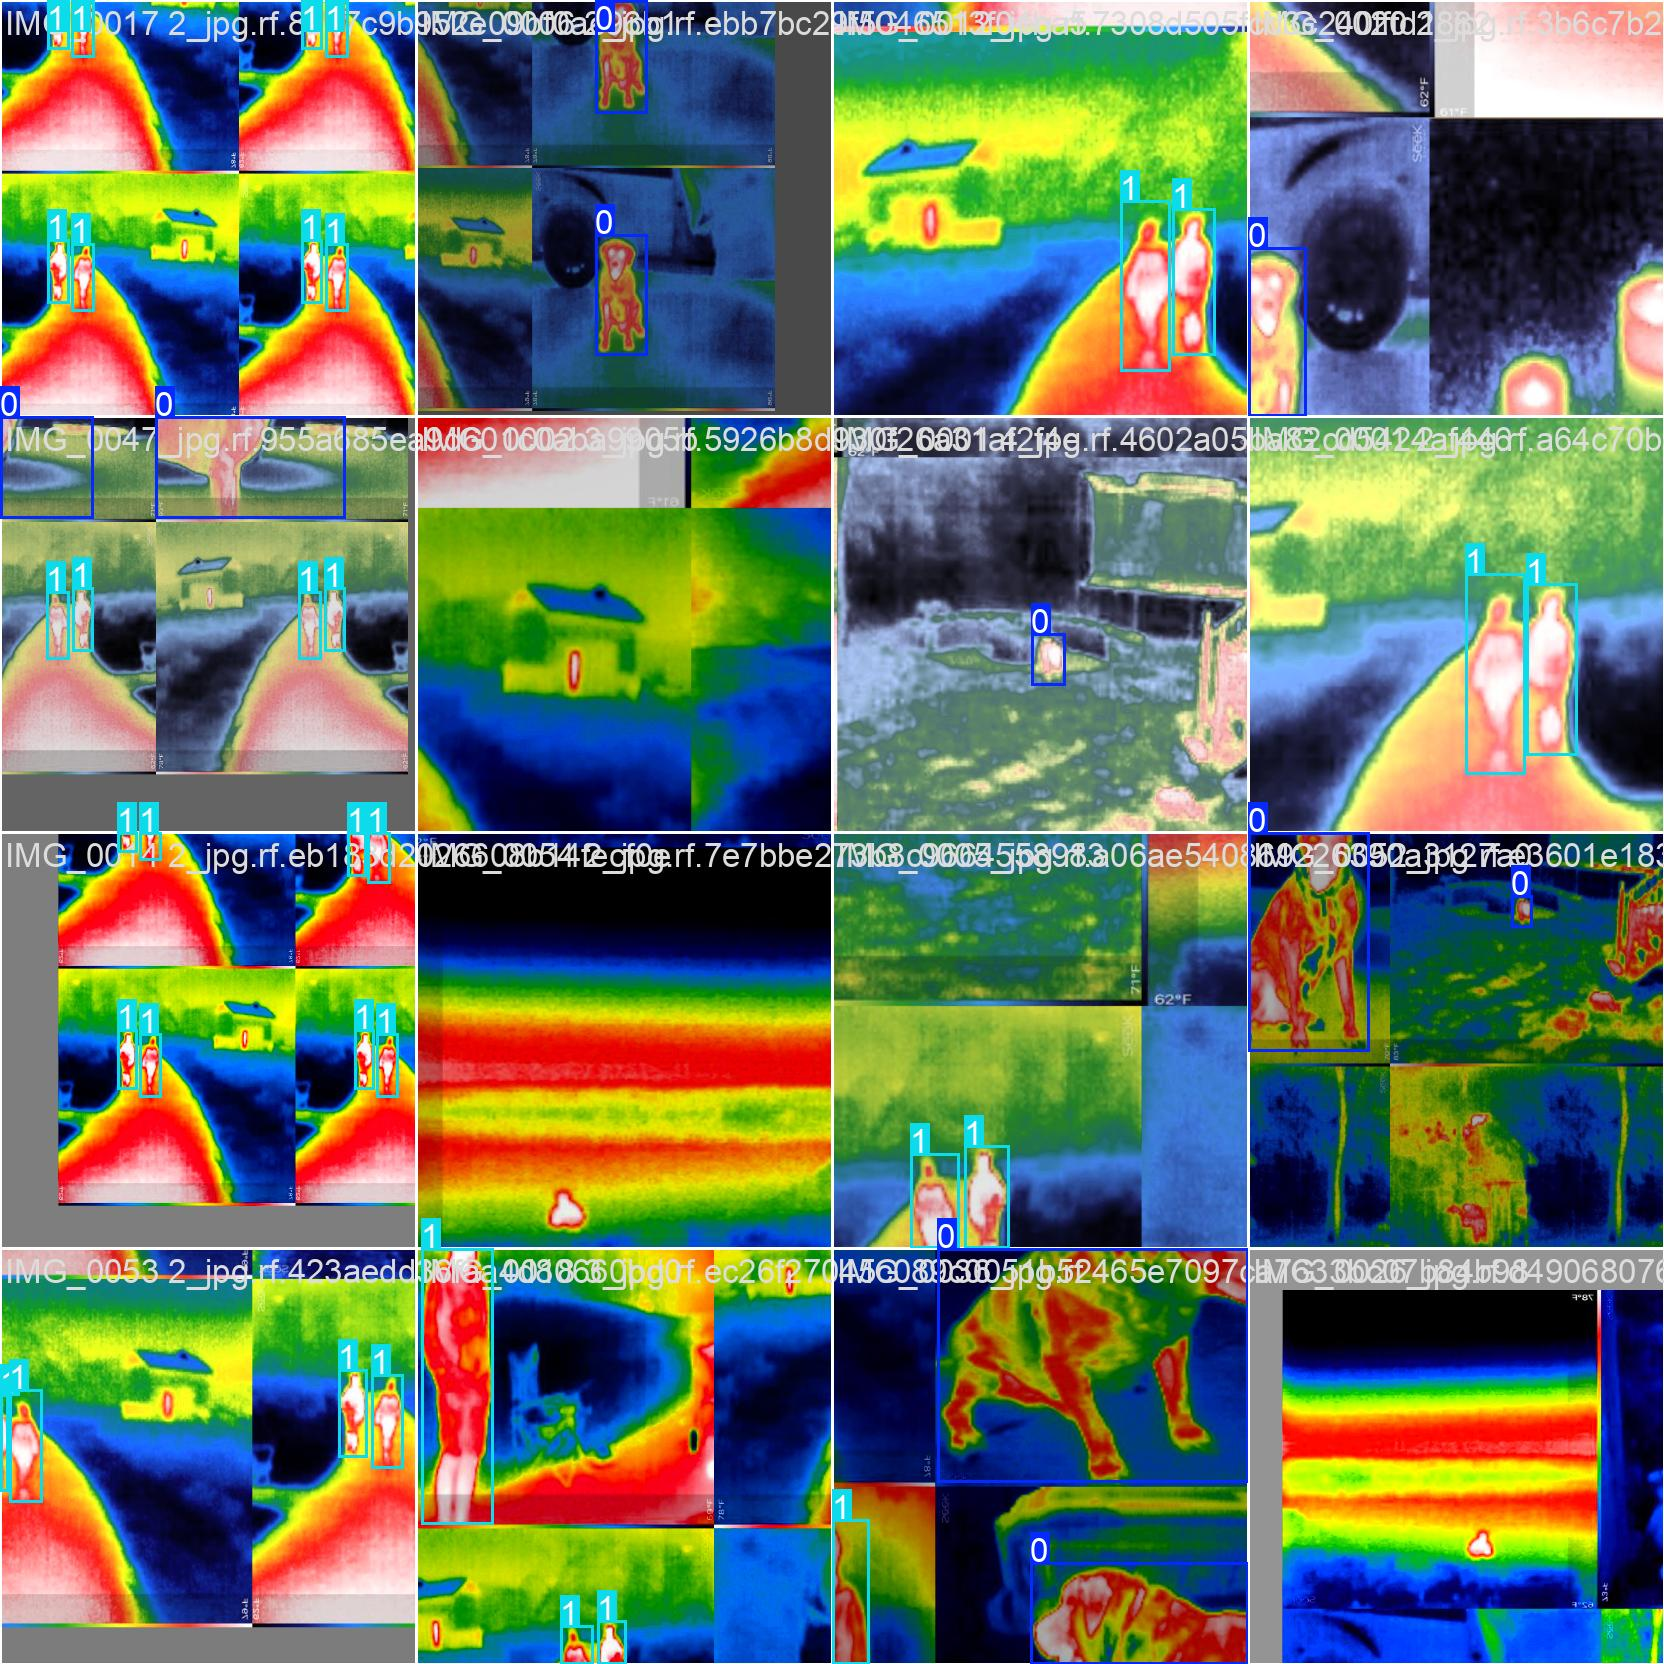

In [69]:
Image(filename='/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/train_batch0.jpg', width=600)

In [72]:
!yolo task=detect mode=val \
model="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train4/weights/best.pt" \
data=data.yaml

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.0 ms, read: 16.8±5.5 MB/s, size: 25.1 KB)
val: Scanning /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/labels.cache... 20 images, 4 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.38it/s]
                   all         20         20      0.981          1      0.995      0.892
                   dog          9          9      0.996          1      0.995       0.94
                person          8         11      0.965          1      0.995      0.843
Speed: 1.7ms preprocess, 20.3ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [73]:
!yolo task=detect mode=predict \
model="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/weights/best.pt" \
conf=0.25 \
source="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images"

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0002 4_jpg.rf.6d1c60bf9f8779f13291c0547ea1ff70.jpg: 416x416 2 persons, 10.9ms
image 2/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 416x416 1 dog, 1 person, 17.0ms
image 3/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0009_jpg.rf.ecdb212f7d7796e682a87e2e1d6e907e.jpg: 416x416 1 dog, 11.8ms
image 4/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0012 2_jpg.rf.4c8e033ea0189ebd28c4e3751edd7a6a.jpg: 416x416 2 persons, 10.1ms
image 5/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/test/images/IMG_0022_jpg.rf.c89662890a0f5d8

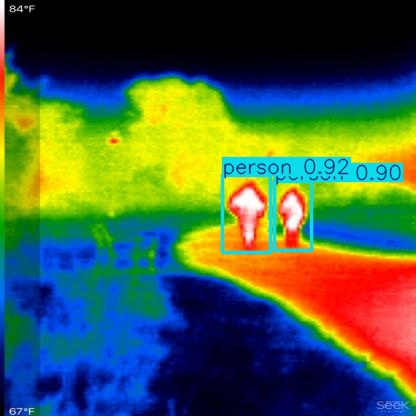

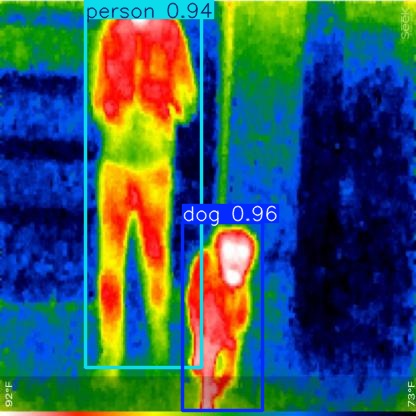

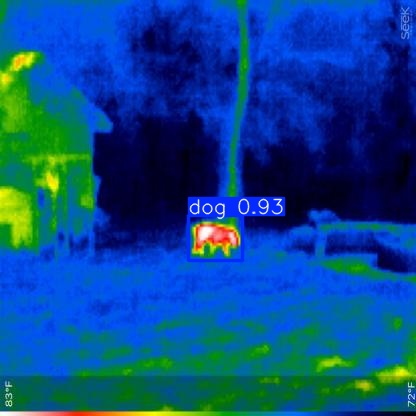

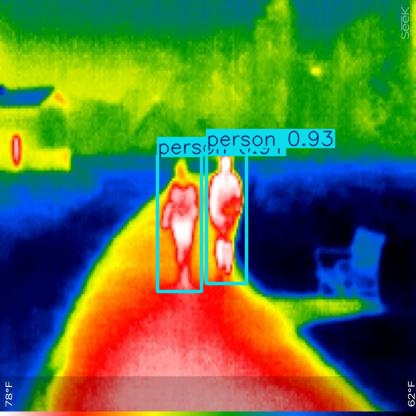

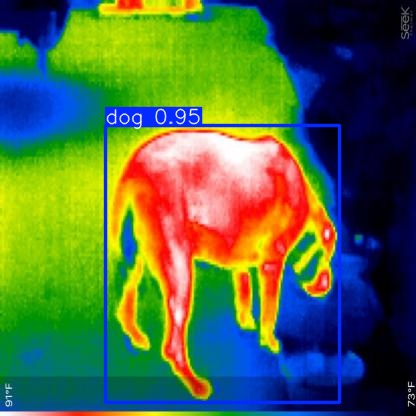

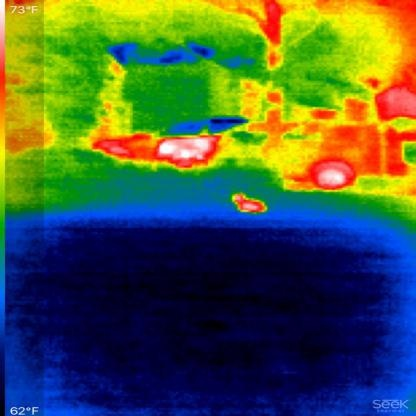

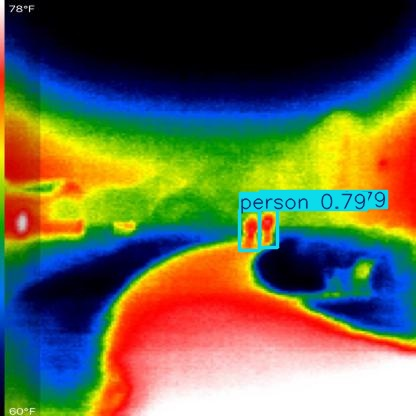

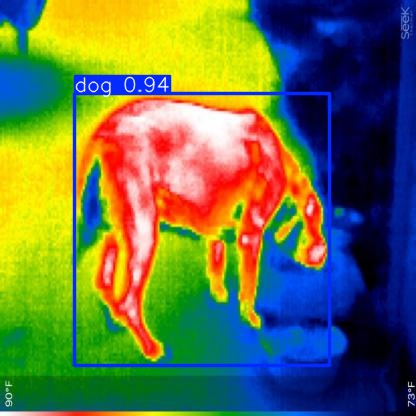

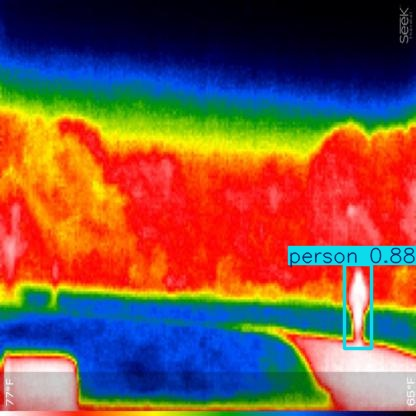

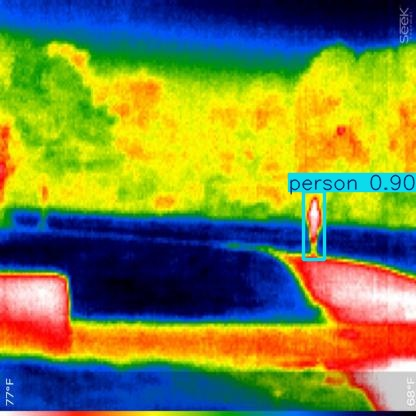

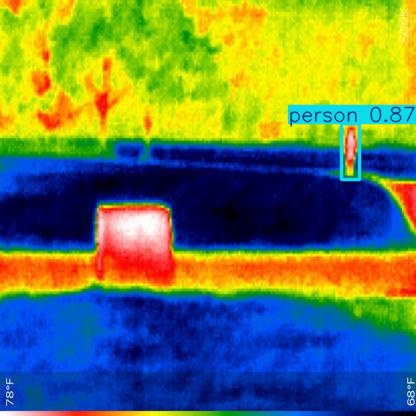

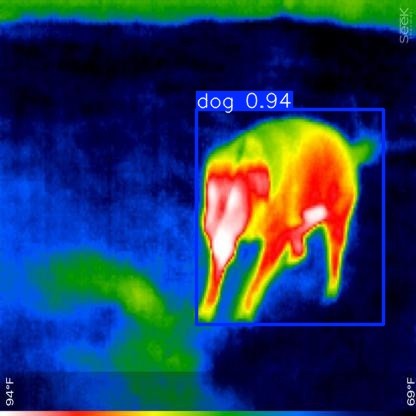

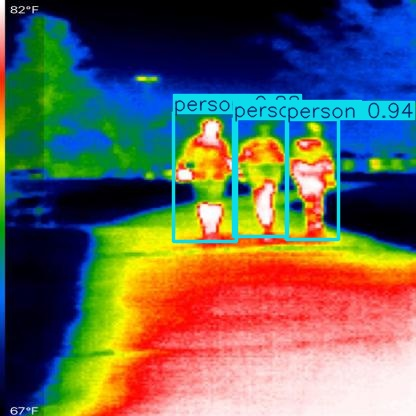

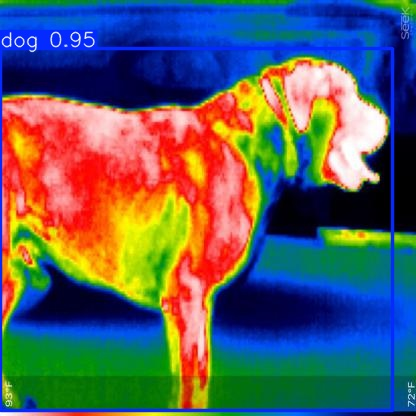

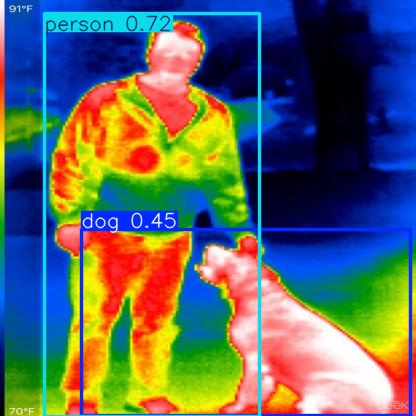

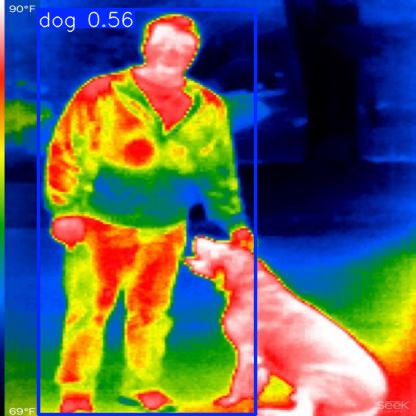

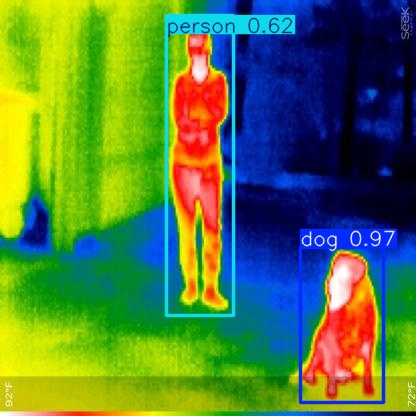

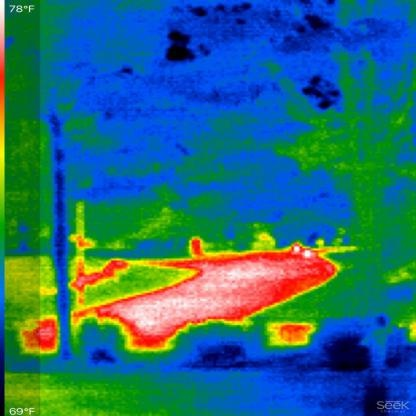

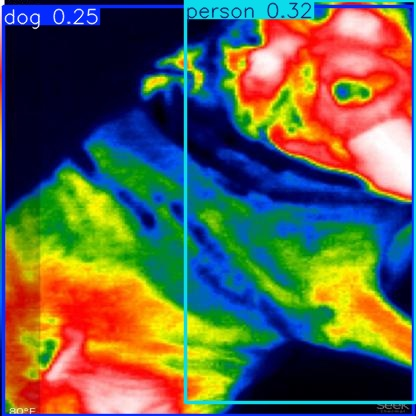

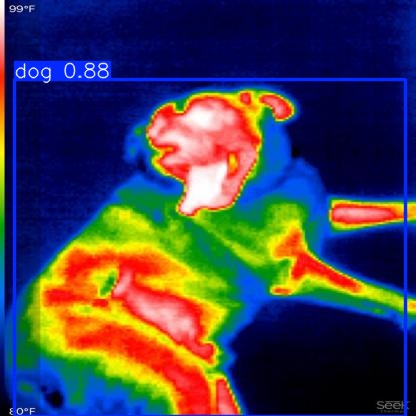

In [74]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [75]:
!yolo task=detect mode=predict \
model="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/train2/weights/best.pt" \
conf=0.25 \
source="/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images"

Ultralytics 8.3.139 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images/IMG_0001 3_jpg.rf.6b8b2c1bb8549fa468fde71f35e3a72a.jpg: 416x416 1 person, 10.9ms
image 2/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images/IMG_0002 5_jpg.rf.d2cd802759e95742d124ad36f932d25f.jpg: 416x416 (no detections), 10.2ms
image 3/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images/IMG_0002_jpg.rf.2698533a21de04406056050cd2796682.jpg: 416x416 (no detections), 10.1ms
image 4/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images/IMG_0003 2_jpg.rf.f8b5d6be996b24bddcd1ae3ec4fe5217.jpg: 416x416 1 dog, 10.1ms
image 5/20 /content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/valid/images/IMG_0006 3_jpg.rf.061

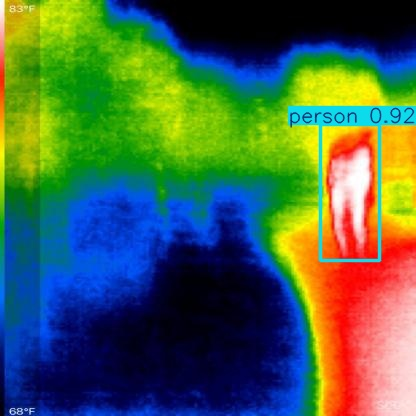

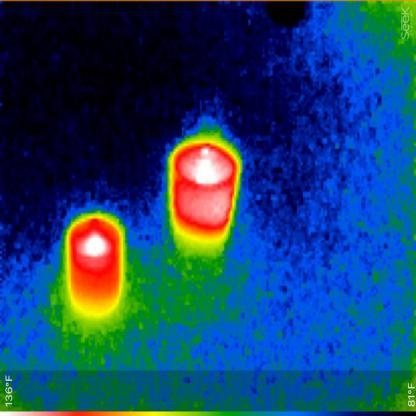

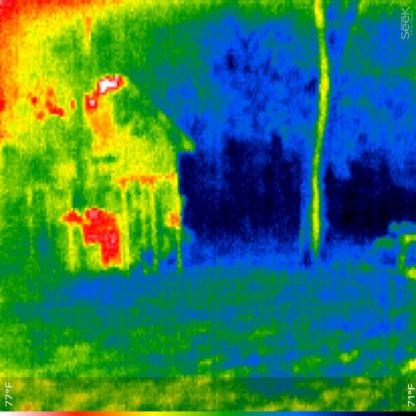

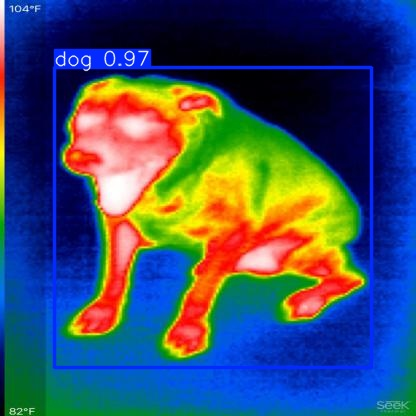

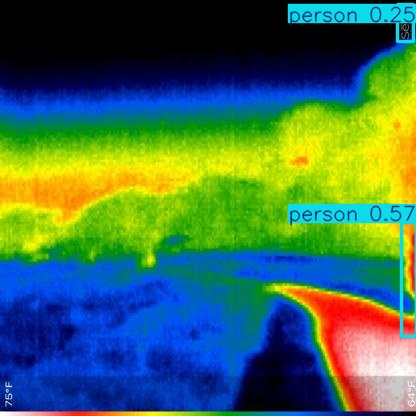

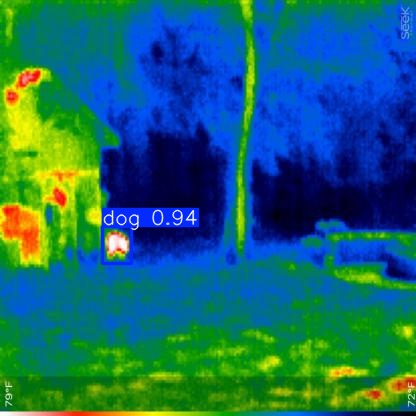

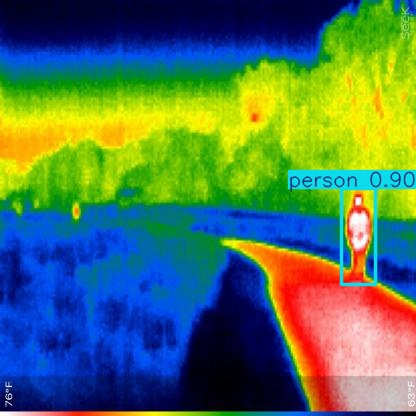

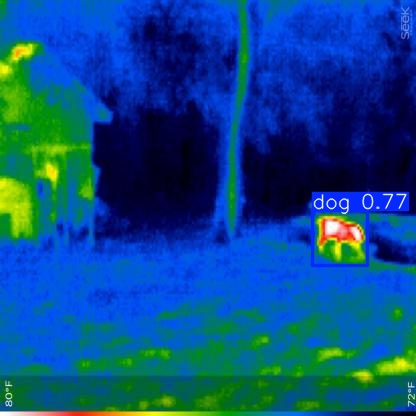

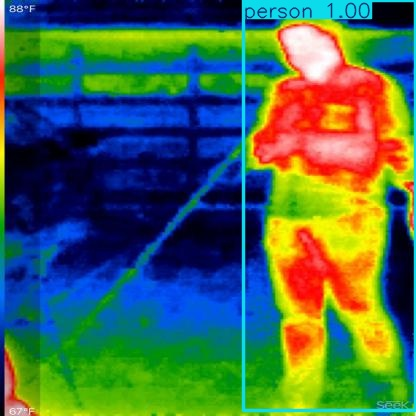

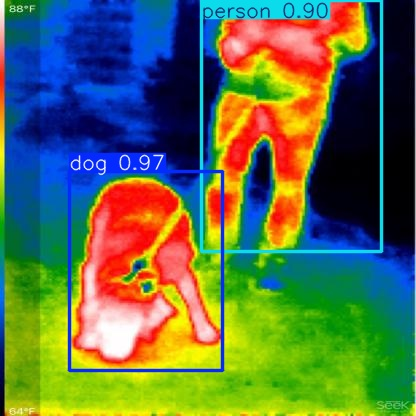

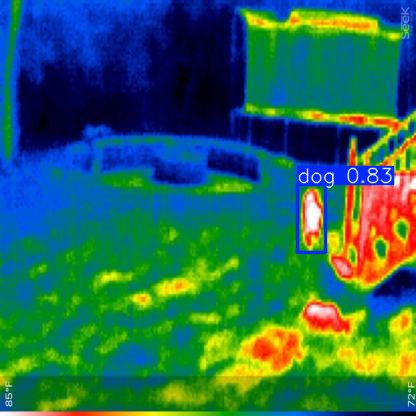

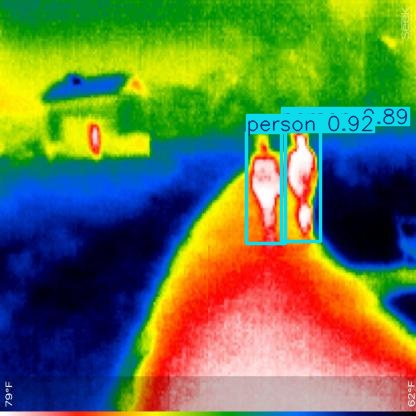

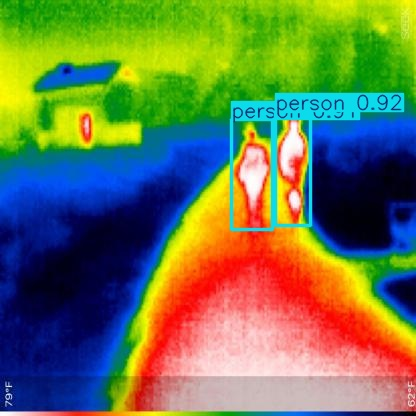

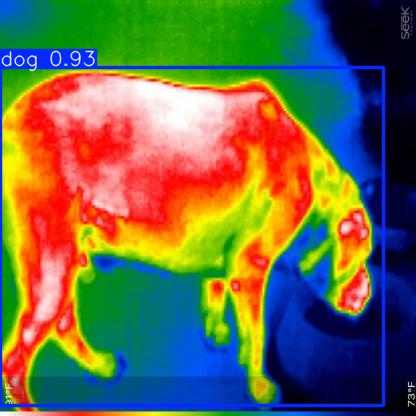

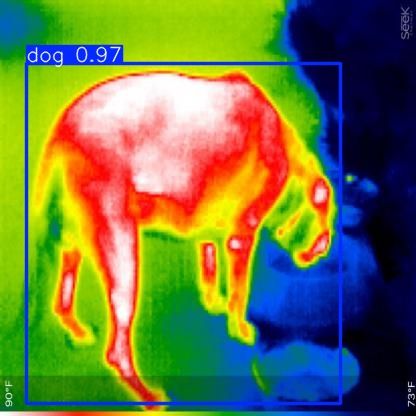

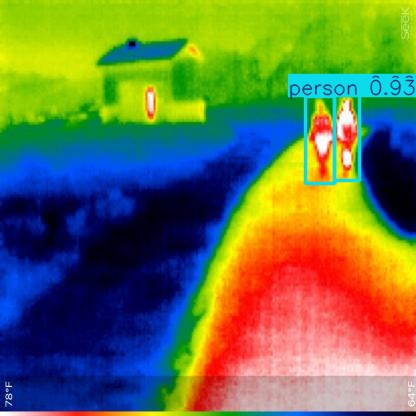

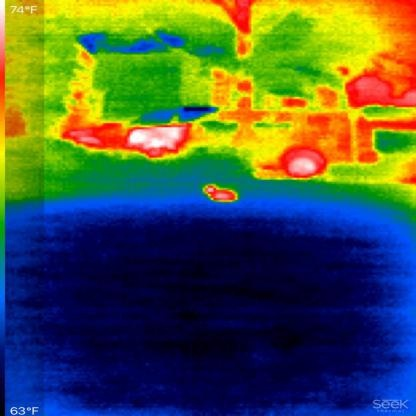

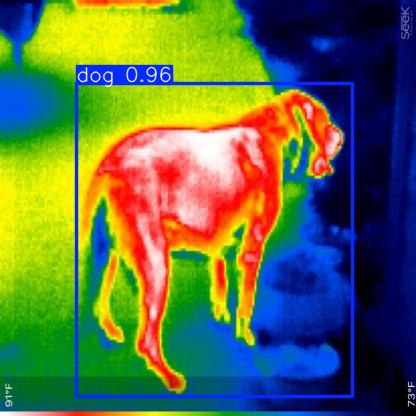

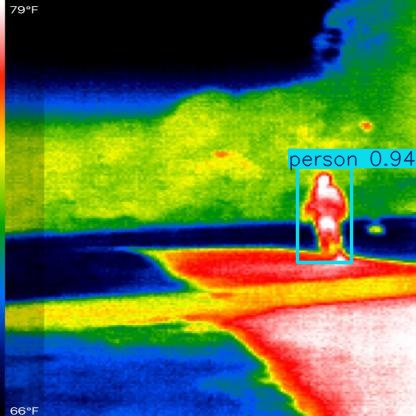

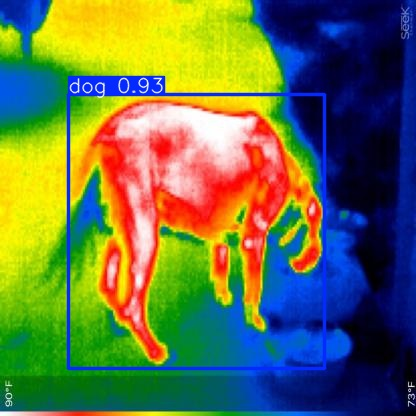

In [76]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/drive/MyDrive/Thermal Dogs and People.v1-resize-416x416.yolov8/runs/detect/predict4/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")